In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble
from sklearn import model_selection
from sklearn import multiclass
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [2]:
# 数据加载
train = pd.read_csv(r'..\新建文件夹\train (1).csv')
train

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,no


In [3]:
test = pd.read_csv(r'..\新建文件夹\test (1).csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [4]:
#离散变量列名
object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','day_of_week']
#连续变量列名
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp_var_rate', 'cons_price_index','cons_conf_index','lending_rate3m', 'nr_employed']
train['subscribe'].replace(['no'],0,inplace=True)
train['subscribe'].replace(['yes'],1,inplace=True)

In [5]:
X=train[['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']]

In [6]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,4621,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74
1,50,services,married,high.school,unknown,yes,no,cellular,may,mon,4715,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79
2,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,171,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61
3,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,359,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87
4,45,admin.,single,university.degree,no,no,no,cellular,nov,tue,3178,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,33,admin.,married,high.school,no,no,no,cellular,aug,fri,4031,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22
22496,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,3185,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80
22497,25,admin.,married,professional.course,no,yes,no,cellular,may,thu,2363,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30
22498,57,retired,married,high.school,no,yes,no,telephone,may,tue,576,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43


In [7]:
data=train

In [8]:
data=train
y=data[ 'subscribe']

In [9]:
X_trans=pd.get_dummies(X,columns=object_columns)

In [10]:
selected_columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed',
       'job_admin.', 'marital_married', 'education_university.degree',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'contact_cellular', 'month_mar', 'month_may', 'month_oct',
       'poutcome_nonexistent', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']

In [11]:
data=X_trans[selected_columns]

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(data_sc,y,random_state=42)

In [16]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [17]:
%%time
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,data_sc,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

Wall time: 12min 38s


,CV Mean,Std
Linear Svm,0.868933,0.004991
Radial Svm,0.874267,0.004186
Logistic Regression,0.869111,0.005580
KNN,0.869244,0.004262
Decision Tree,0.838089,0.009147
Naive Bayes,0.866489,0.006056
Random Forest,0.881644,0.004725


<AxesSubplot:>

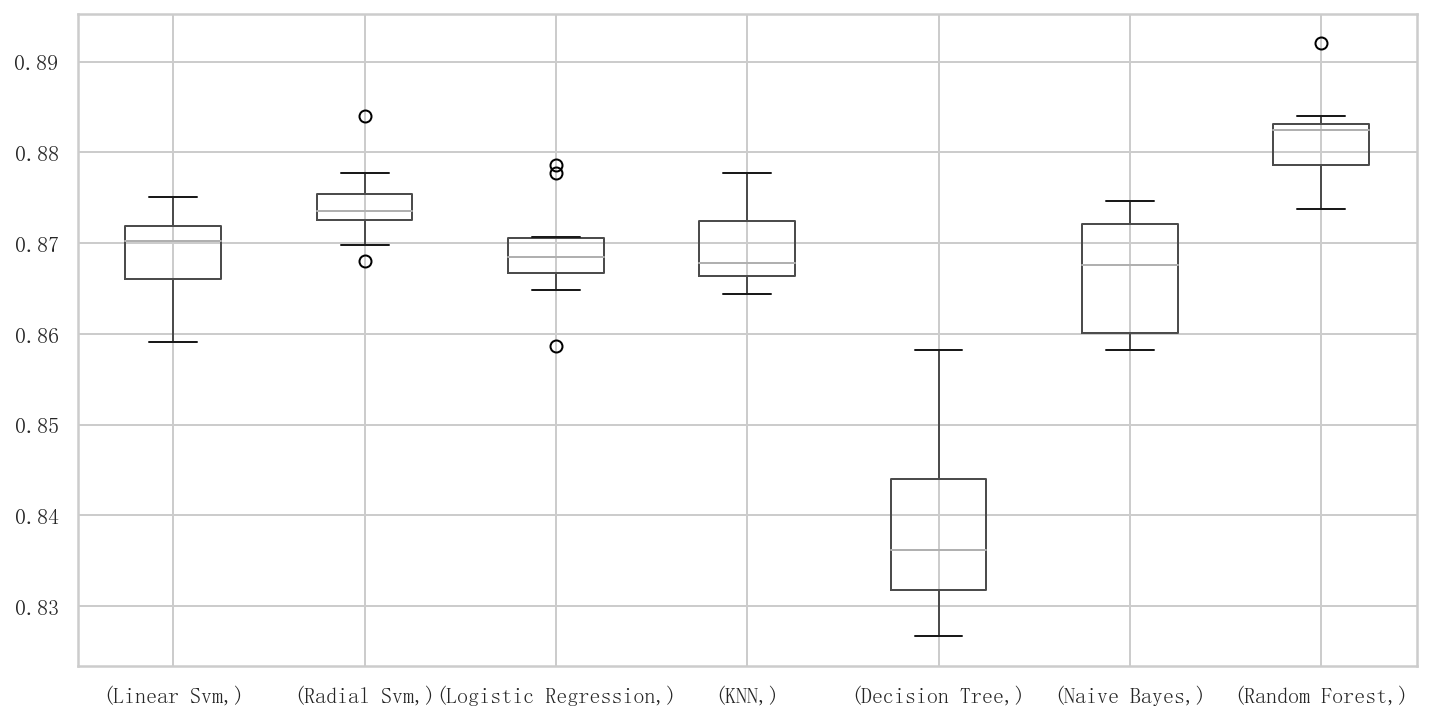

In [18]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

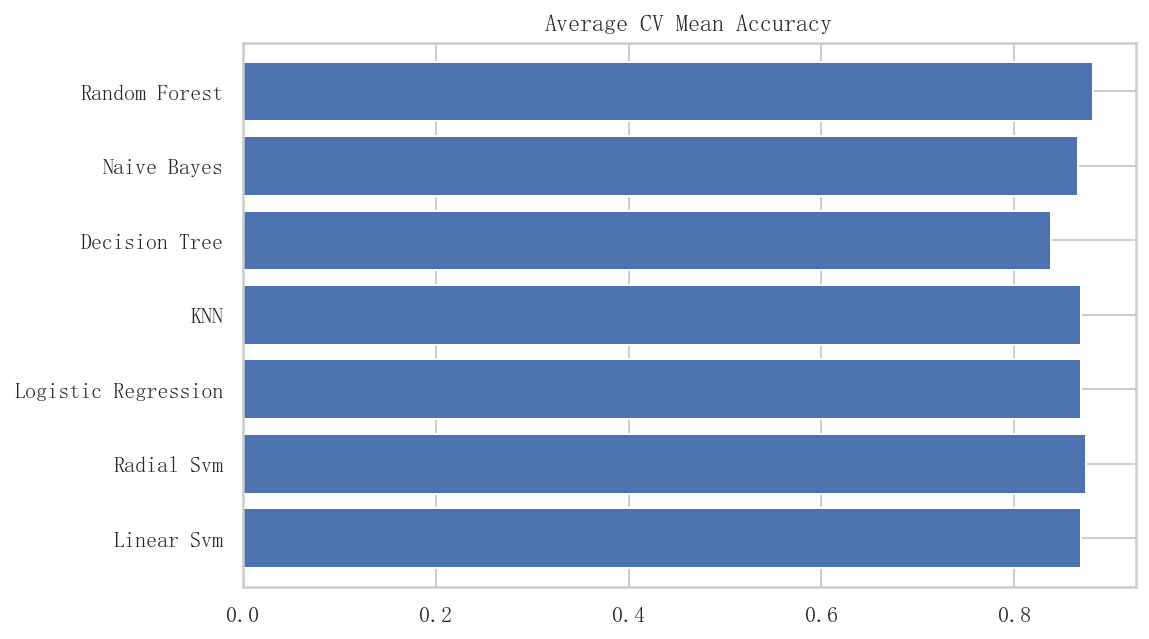

In [19]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [21]:
%%time
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,data_sc,y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[18:42:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:42:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:43:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [22]:
import lightgbm as lgm
lightgbm=lgm.LGBMClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(lightgbm,data_sc,y,cv=10,scoring='accuracy')
print('The cross validated score for lightgbm is:',result.mean())

The cross validated score for lightgbm is: 0.8806222222222223


## 先调LGM

In [23]:
import numpy as np
import optuna

import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
def objective(trial):
    train = pd.read_csv(r'..\新建文件夹\train (1).csv')
    #离散变量列名
    object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','day_of_week']
    #连续变量列名
    num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp_var_rate', 'cons_price_index','cons_conf_index','lending_rate3m', 'nr_employed']
    train['subscribe'].replace(['no'],0,inplace=True)
    train['subscribe'].replace(['yes'],1,inplace=True)
    X=train[['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']]
    data=train
    y=data[ 'subscribe']
    X_trans=pd.get_dummies(X,columns=object_columns)
    selected_columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed',
       'job_admin.', 'marital_married', 'education_university.degree',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'contact_cellular', 'month_mar', 'month_may', 'month_oct',
       'poutcome_nonexistent', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']
    data=X_trans[selected_columns]
    sc=StandardScaler()
    data_sc=sc.fit_transform(data)
    train_x, valid_x, train_y, valid_y = train_test_split(data_sc,y, random_state=42)
    
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [24]:
if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-07-15 19:04:39,005] A new study created in memory with name: no-name-bd2782d1-71de-47d1-a57b-6fb3a07bb48f


[1]	valid_0's auc: 0.857647
[2]	valid_0's auc: 0.870473
[3]	valid_0's auc: 0.872089
[4]	valid_0's auc: 0.877411
[5]	valid_0's auc: 0.879347
[6]	valid_0's auc: 0.882406
[7]	valid_0's auc: 0.883252
[8]	valid_0's auc: 0.883619
[9]	valid_0's auc: 0.883007
[10]	valid_0's auc: 0.883278
[11]	valid_0's auc: 0.883607
[12]	valid_0's auc: 0.883388
[13]	valid_0's auc: 0.884619
[14]	valid_0's auc: 0.884882
[15]	valid_0's auc: 0.885176
[16]	valid_0's auc: 0.885806
[17]	valid_0's auc: 0.886465
[18]	valid_0's auc: 0.885911
[19]	valid_0's auc: 0.886018
[20]	valid_0's auc: 0.886518
[21]	valid_0's auc: 0.88647
[22]	valid_0's auc: 0.886845
[23]	valid_0's auc: 0.886739
[24]	valid_0's auc: 0.886656
[25]	valid_0's auc: 0.887173
[26]	valid_0's auc: 0.887383
[27]	valid_0's auc: 0.887048
[28]	valid_0's auc: 0.886111
[29]	valid_0's auc: 0.885793
[30]	valid_0's auc: 0.885463
[31]	valid_0's auc: 0.885626
[32]	valid_0's auc: 0.885558
[33]	valid_0's auc: 0.885825
[34]	valid_0's auc: 0.885461
[35]	valid_0's auc: 0.88

[I 2022-07-15 19:04:42,370] Trial 0 finished with value: 0.8784 and parameters: {'lambda_l1': 8.132644979054426e-07, 'lambda_l2': 7.557150580837896e-06, 'num_leaves': 110, 'feature_fraction': 0.907256742527695, 'bagging_fraction': 0.7665700788776433, 'bagging_freq': 3, 'min_child_samples': 55}. Best is trial 0 with value: 0.8784.


[1]	valid_0's auc: 0.844971
[2]	valid_0's auc: 0.856297
[3]	valid_0's auc: 0.8696
[4]	valid_0's auc: 0.869576
[5]	valid_0's auc: 0.871238
[6]	valid_0's auc: 0.872188
[7]	valid_0's auc: 0.870133
[8]	valid_0's auc: 0.874093
[9]	valid_0's auc: 0.872505
[10]	valid_0's auc: 0.874417
[11]	valid_0's auc: 0.876143
[12]	valid_0's auc: 0.878469
[13]	valid_0's auc: 0.87917
[14]	valid_0's auc: 0.879868
[15]	valid_0's auc: 0.881577
[16]	valid_0's auc: 0.880698
[17]	valid_0's auc: 0.880819
[18]	valid_0's auc: 0.880539
[19]	valid_0's auc: 0.879549
[20]	valid_0's auc: 0.879248
[21]	valid_0's auc: 0.87939
[22]	valid_0's auc: 0.879454
[23]	valid_0's auc: 0.878436
[24]	valid_0's auc: 0.879235
[25]	valid_0's auc: 0.878853
[26]	valid_0's auc: 0.877998
[27]	valid_0's auc: 0.878081
[28]	valid_0's auc: 0.87833
[29]	valid_0's auc: 0.879593
[30]	valid_0's auc: 0.879429
[31]	valid_0's auc: 0.87968
[32]	valid_0's auc: 0.879489
[33]	valid_0's auc: 0.879627
[34]	valid_0's auc: 0.878579
[35]	valid_0's auc: 0.877573


[I 2022-07-15 19:04:47,673] Trial 1 finished with value: 0.8760888888888889 and parameters: {'lambda_l1': 2.069225897026203e-07, 'lambda_l2': 1.7209914289645164e-06, 'num_leaves': 248, 'feature_fraction': 0.7130821519868134, 'bagging_fraction': 0.5390342722792165, 'bagging_freq': 2, 'min_child_samples': 22}. Best is trial 0 with value: 0.8784.


[1]	valid_0's auc: 0.843789
[2]	valid_0's auc: 0.859906
[3]	valid_0's auc: 0.866821
[4]	valid_0's auc: 0.873186
[5]	valid_0's auc: 0.87533
[6]	valid_0's auc: 0.880127
[7]	valid_0's auc: 0.881058
[8]	valid_0's auc: 0.882288
[9]	valid_0's auc: 0.882039
[10]	valid_0's auc: 0.882866
[11]	valid_0's auc: 0.88337
[12]	valid_0's auc: 0.884511
[13]	valid_0's auc: 0.884449
[14]	valid_0's auc: 0.884015
[15]	valid_0's auc: 0.885027
[16]	valid_0's auc: 0.885095
[17]	valid_0's auc: 0.886276
[18]	valid_0's auc: 0.886233
[19]	valid_0's auc: 0.886926
[20]	valid_0's auc: 0.88705
[21]	valid_0's auc: 0.886661
[22]	valid_0's auc: 0.886514
[23]	valid_0's auc: 0.886556
[24]	valid_0's auc: 0.886437
[25]	valid_0's auc: 0.885999
[26]	valid_0's auc: 0.885438
[27]	valid_0's auc: 0.885118
[28]	valid_0's auc: 0.884661
[29]	valid_0's auc: 0.884354
[30]	valid_0's auc: 0.884425
[31]	valid_0's auc: 0.884793
[32]	valid_0's auc: 0.885613
[33]	valid_0's auc: 0.884947
[34]	valid_0's auc: 0.884879
[35]	valid_0's auc: 0.8848

[I 2022-07-15 19:04:50,564] Trial 2 finished with value: 0.8789333333333333 and parameters: {'lambda_l1': 2.246890698358555e-08, 'lambda_l2': 5.270012381294786e-05, 'num_leaves': 193, 'feature_fraction': 0.8623397960319936, 'bagging_fraction': 0.5682211609521872, 'bagging_freq': 5, 'min_child_samples': 52}. Best is trial 2 with value: 0.8789333333333333.


[1]	valid_0's auc: 0.859446
[2]	valid_0's auc: 0.874768
[3]	valid_0's auc: 0.877494
[4]	valid_0's auc: 0.87834
[5]	valid_0's auc: 0.880758
[6]	valid_0's auc: 0.881688
[7]	valid_0's auc: 0.880558
[8]	valid_0's auc: 0.882553
[9]	valid_0's auc: 0.88134
[10]	valid_0's auc: 0.882772
[11]	valid_0's auc: 0.883158
[12]	valid_0's auc: 0.883381
[13]	valid_0's auc: 0.885265
[14]	valid_0's auc: 0.886573
[15]	valid_0's auc: 0.886358
[16]	valid_0's auc: 0.886168
[17]	valid_0's auc: 0.886236
[18]	valid_0's auc: 0.885488
[19]	valid_0's auc: 0.885796
[20]	valid_0's auc: 0.885599
[21]	valid_0's auc: 0.88619
[22]	valid_0's auc: 0.886721
[23]	valid_0's auc: 0.886672
[24]	valid_0's auc: 0.886861
[25]	valid_0's auc: 0.887292
[26]	valid_0's auc: 0.887644
[27]	valid_0's auc: 0.887504
[28]	valid_0's auc: 0.887107
[29]	valid_0's auc: 0.886968
[30]	valid_0's auc: 0.886972
[31]	valid_0's auc: 0.88693
[32]	valid_0's auc: 0.887315
[33]	valid_0's auc: 0.887437
[34]	valid_0's auc: 0.887641
[35]	valid_0's auc: 0.88770

[I 2022-07-15 19:04:52,859] Trial 3 finished with value: 0.8862222222222222 and parameters: {'lambda_l1': 0.07793858369319971, 'lambda_l2': 0.021361931361032562, 'num_leaves': 195, 'feature_fraction': 0.720975020696137, 'bagging_fraction': 0.7674134768294851, 'bagging_freq': 3, 'min_child_samples': 89}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.838394
[2]	valid_0's auc: 0.855037
[3]	valid_0's auc: 0.86487
[4]	valid_0's auc: 0.868462
[5]	valid_0's auc: 0.874856
[6]	valid_0's auc: 0.879491
[7]	valid_0's auc: 0.879269
[8]	valid_0's auc: 0.880226
[9]	valid_0's auc: 0.879164
[10]	valid_0's auc: 0.881419
[11]	valid_0's auc: 0.881877
[12]	valid_0's auc: 0.88285
[13]	valid_0's auc: 0.883354
[14]	valid_0's auc: 0.882648
[15]	valid_0's auc: 0.882552
[16]	valid_0's auc: 0.881893
[17]	valid_0's auc: 0.88179
[18]	valid_0's auc: 0.881652
[19]	valid_0's auc: 0.881101
[20]	valid_0's auc: 0.880631
[21]	valid_0's auc: 0.881305
[22]	valid_0's auc: 0.882149
[23]	valid_0's auc: 0.881454
[24]	valid_0's auc: 0.8817
[25]	valid_0's auc: 0.881337
[26]	valid_0's auc: 0.881128
[27]	valid_0's auc: 0.880935
[28]	valid_0's auc: 0.881461
[29]	valid_0's auc: 0.882179
[30]	valid_0's auc: 0.882419
[31]	valid_0's auc: 0.882911
[32]	valid_0's auc: 0.882694
[33]	valid_0's auc: 0.882616
[34]	valid_0's auc: 0.882661
[35]	valid_0's auc: 0.882127

[I 2022-07-15 19:04:56,670] Trial 4 finished with value: 0.8851555555555556 and parameters: {'lambda_l1': 0.0030664690628080726, 'lambda_l2': 3.2823435647343326e-06, 'num_leaves': 194, 'feature_fraction': 0.7369495423964092, 'bagging_fraction': 0.511428177759353, 'bagging_freq': 4, 'min_child_samples': 27}. Best is trial 3 with value: 0.8862222222222222.


[100]	valid_0's auc: 0.873495


[I 2022-07-15 19:04:56,992] Trial 5 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.839536
[2]	valid_0's auc: 0.845906
[3]	valid_0's auc: 0.846583
[4]	valid_0's auc: 0.847522
[5]	valid_0's auc: 0.854306
[6]	valid_0's auc: 0.859517
[7]	valid_0's auc: 0.861554
[8]	valid_0's auc: 0.863739
[9]	valid_0's auc: 0.865595
[10]	valid_0's auc: 0.86604
[1]	valid_0's auc: 0.826966
[2]	valid_0's auc: 0.834917
[3]	valid_0's auc: 0.83017
[4]	valid_0's auc: 0.827529
[5]	valid_0's auc: 0.856134
[6]	valid_0's auc: 0.849858
[7]	valid_0's auc: 0.846746


[I 2022-07-15 19:04:57,648] Trial 6 pruned. Trial was pruned at iteration 10.


[8]	valid_0's auc: 0.853644
[9]	valid_0's auc: 0.85313
[10]	valid_0's auc: 0.854865


[I 2022-07-15 19:04:58,017] Trial 7 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.811467
[2]	valid_0's auc: 0.84425
[3]	valid_0's auc: 0.843159
[4]	valid_0's auc: 0.845289
[5]	valid_0's auc: 0.854855
[6]	valid_0's auc: 0.853225
[7]	valid_0's auc: 0.849434
[8]	valid_0's auc: 0.859832
[9]	valid_0's auc: 0.858066
[10]	valid_0's auc: 0.85757
[1]	valid_0's auc: 0.834296
[2]	valid_0's auc: 0.86123
[3]	valid_0's auc: 0.869232
[4]	valid_0's auc: 0.870711
[5]	valid_0's auc: 0.875426
[6]	valid_0's auc: 0.878079
[7]	valid_0's auc: 0.877615
[8]	valid_0's auc: 0.879331
[9]	valid_0's auc: 0.877579
[10]	valid_0's auc: 0.880571


[I 2022-07-15 19:04:58,973] Trial 8 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.850013
[2]	valid_0's auc: 0.859629
[3]	valid_0's auc: 0.860361
[4]	valid_0's auc: 0.858487
[5]	valid_0's auc: 0.872583
[6]	valid_0's auc: 0.871025
[7]	valid_0's auc: 0.869773


[I 2022-07-15 19:04:59,621] Trial 9 pruned. Trial was pruned at iteration 10.


[8]	valid_0's auc: 0.875672
[9]	valid_0's auc: 0.874418
[10]	valid_0's auc: 0.873572
[1]	valid_0's auc: 0.856119
[2]	valid_0's auc: 0.87591
[3]	valid_0's auc: 0.873023
[4]	valid_0's auc: 0.872132
[5]	valid_0's auc: 0.876447
[6]	valid_0's auc: 0.875774
[7]	valid_0's auc: 0.873537
[8]	valid_0's auc: 0.878429


[I 2022-07-15 19:05:00,290] Trial 10 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.876259
[10]	valid_0's auc: 0.879691
[1]	valid_0's auc: 0.862947
[2]	valid_0's auc: 0.868904
[3]	valid_0's auc: 0.876417
[4]	valid_0's auc: 0.876833
[5]	valid_0's auc: 0.879758
[6]	valid_0's auc: 0.881064
[7]	valid_0's auc: 0.879881
[8]	valid_0's auc: 0.882456
[9]	valid_0's auc: 0.882173
[10]	valid_0's auc: 0.883502
[11]	valid_0's auc: 0.884301
[12]	valid_0's auc: 0.884905
[13]	valid_0's auc: 0.88501
[14]	valid_0's auc: 0.884711
[15]	valid_0's auc: 0.885495
[16]	valid_0's auc: 0.885819
[17]	valid_0's auc: 0.886255
[18]	valid_0's auc: 0.886708
[19]	valid_0's auc: 0.887132
[20]	valid_0's auc: 0.887479
[21]	valid_0's auc: 0.887732
[22]	valid_0's auc: 0.8878
[23]	valid_0's auc: 0.887799
[24]	valid_0's auc: 0.88802
[25]	valid_0's auc: 0.888188
[26]	valid_0's auc: 0.888904
[27]	valid_0's auc: 0.888957
[28]	valid_0's auc: 0.889011
[29]	valid_0's auc: 0.889276
[30]	valid_0's auc: 0.888994
[31]	valid_0's auc: 0.889311
[32]	valid_0's auc: 0.889336
[33]	valid_0's auc: 0.889255

[I 2022-07-15 19:05:04,936] Trial 11 finished with value: 0.8824888888888889 and parameters: {'lambda_l1': 0.0008550060384494356, 'lambda_l2': 6.415054026262762, 'num_leaves': 195, 'feature_fraction': 0.7864869146344249, 'bagging_fraction': 0.863430425919491, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 3 with value: 0.8862222222222222.


[100]	valid_0's auc: 0.883925
[1]	valid_0's auc: 0.836999
[2]	valid_0's auc: 0.86704
[3]	valid_0's auc: 0.865156
[4]	valid_0's auc: 0.86805
[5]	valid_0's auc: 0.87429


[I 2022-07-15 19:05:05,702] Trial 12 pruned. Trial was pruned at iteration 10.


[6]	valid_0's auc: 0.873214
[7]	valid_0's auc: 0.8729
[8]	valid_0's auc: 0.878617
[9]	valid_0's auc: 0.876628
[10]	valid_0's auc: 0.880088
[1]	valid_0's auc: 0.85128
[2]	valid_0's auc: 0.867874
[3]	valid_0's auc: 0.873446
[4]	valid_0's auc: 0.875816
[5]	valid_0's auc: 0.878912
[6]	valid_0's auc: 0.879849
[7]	valid_0's auc: 0.879978
[8]	valid_0's auc: 0.881604
[9]	valid_0's auc: 0.882383
[10]	valid_0's auc: 0.882601


[I 2022-07-15 19:05:06,710] Trial 13 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.85012
[2]	valid_0's auc: 0.86052
[3]	valid_0's auc: 0.867687
[4]	valid_0's auc: 0.870709
[5]	valid_0's auc: 0.874068
[6]	valid_0's auc: 0.874688
[7]	valid_0's auc: 0.878229
[8]	valid_0's auc: 0.879792
[9]	valid_0's auc: 0.879797
[10]	valid_0's auc: 0.88072


[I 2022-07-15 19:05:08,166] Trial 14 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.842041
[2]	valid_0's auc: 0.868054
[3]	valid_0's auc: 0.867939


[I 2022-07-15 19:05:08,878] Trial 15 pruned. Trial was pruned at iteration 10.


[4]	valid_0's auc: 0.869398
[5]	valid_0's auc: 0.872362
[6]	valid_0's auc: 0.874777
[7]	valid_0's auc: 0.875244
[8]	valid_0's auc: 0.877405
[9]	valid_0's auc: 0.875509
[10]	valid_0's auc: 0.878354
[1]	valid_0's auc: 0.836015
[2]	valid_0's auc: 0.864038
[3]	valid_0's auc: 0.875724
[4]	valid_0's auc: 0.876938
[5]	valid_0's auc: 0.880794
[6]	valid_0's auc: 0.881154
[7]	valid_0's auc: 0.882387
[8]	valid_0's auc: 0.882943
[9]	valid_0's auc: 0.882967
[10]	valid_0's auc: 0.883749
[11]	valid_0's auc: 0.884762
[12]	valid_0's auc: 0.885115
[13]	valid_0's auc: 0.885793
[14]	valid_0's auc: 0.886341
[15]	valid_0's auc: 0.886714
[16]	valid_0's auc: 0.885631
[17]	valid_0's auc: 0.886127
[18]	valid_0's auc: 0.886222
[19]	valid_0's auc: 0.886988
[20]	valid_0's auc: 0.886957
[21]	valid_0's auc: 0.886694
[22]	valid_0's auc: 0.886527
[23]	valid_0's auc: 0.886303
[24]	valid_0's auc: 0.886296
[25]	valid_0's auc: 0.886625
[26]	valid_0's auc: 0.886106
[27]	valid_0's auc: 0.885866
[28]	valid_0's auc: 0.885666


[I 2022-07-15 19:05:12,529] Trial 16 finished with value: 0.8832 and parameters: {'lambda_l1': 0.008113791544717457, 'lambda_l2': 7.064108659180401e-07, 'num_leaves': 164, 'feature_fraction': 0.80214113526662, 'bagging_fraction': 0.7027616885393059, 'bagging_freq': 1, 'min_child_samples': 37}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.854755
[2]	valid_0's auc: 0.872484
[3]	valid_0's auc: 0.878398
[4]	valid_0's auc: 0.877183
[5]	valid_0's auc: 0.880984
[6]	valid_0's auc: 0.882601
[7]	valid_0's auc: 0.880309


[I 2022-07-15 19:05:13,290] Trial 17 pruned. Trial was pruned at iteration 10.


[8]	valid_0's auc: 0.881571
[9]	valid_0's auc: 0.878902
[10]	valid_0's auc: 0.88186


[I 2022-07-15 19:05:13,826] Trial 18 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.837506
[2]	valid_0's auc: 0.863144
[3]	valid_0's auc: 0.863896
[4]	valid_0's auc: 0.868658
[5]	valid_0's auc: 0.873007
[6]	valid_0's auc: 0.870559
[7]	valid_0's auc: 0.867642
[8]	valid_0's auc: 0.871136
[9]	valid_0's auc: 0.868577
[10]	valid_0's auc: 0.868365


[I 2022-07-15 19:05:14,340] Trial 19 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.84352
[2]	valid_0's auc: 0.871038
[3]	valid_0's auc: 0.868503
[4]	valid_0's auc: 0.867422
[5]	valid_0's auc: 0.873681
[6]	valid_0's auc: 0.87581
[7]	valid_0's auc: 0.87429
[8]	valid_0's auc: 0.875869
[9]	valid_0's auc: 0.875752
[10]	valid_0's auc: 0.879008
[1]	valid_0's auc: 0.850376
[2]	valid_0's auc: 0.866366
[3]	valid_0's auc: 0.871941
[4]	valid_0's auc: 0.876287
[5]	valid_0's auc: 0.878754
[6]	valid_0's auc: 0.879492
[7]	valid_0's auc: 0.881463
[8]	valid_0's auc: 0.881439
[9]	valid_0's auc: 0.880985
[10]	valid_0's auc: 0.883727
[11]	valid_0's auc: 0.884453
[12]	valid_0's auc: 0.884497
[13]	valid_0's auc: 0.885016
[14]	valid_0's auc: 0.885528
[15]	valid_0's auc: 0.886033


[I 2022-07-15 19:05:15,232] Trial 20 pruned. Trial was pruned at iteration 16.


[16]	valid_0's auc: 0.885393
[1]	valid_0's auc: 0.842226
[2]	valid_0's auc: 0.866939
[3]	valid_0's auc: 0.875835
[4]	valid_0's auc: 0.876523
[5]	valid_0's auc: 0.879466
[6]	valid_0's auc: 0.881984
[7]	valid_0's auc: 0.883216
[8]	valid_0's auc: 0.884579
[9]	valid_0's auc: 0.883703


[I 2022-07-15 19:05:16,001] Trial 21 pruned. Trial was pruned at iteration 16.


[10]	valid_0's auc: 0.88449
[11]	valid_0's auc: 0.885207
[12]	valid_0's auc: 0.885037
[13]	valid_0's auc: 0.886008
[14]	valid_0's auc: 0.885003
[15]	valid_0's auc: 0.884893
[16]	valid_0's auc: 0.884582
[1]	valid_0's auc: 0.844124
[2]	valid_0's auc: 0.863041
[3]	valid_0's auc: 0.873185
[4]	valid_0's auc: 0.877043
[5]	valid_0's auc: 0.878279
[6]	valid_0's auc: 0.878993
[7]	valid_0's auc: 0.879781
[8]	valid_0's auc: 0.880195
[9]	valid_0's auc: 0.880984


[I 2022-07-15 19:05:16,591] Trial 22 pruned. Trial was pruned at iteration 10.


[10]	valid_0's auc: 0.880786
[1]	valid_0's auc: 0.854079
[2]	valid_0's auc: 0.866498
[3]	valid_0's auc: 0.873835
[4]	valid_0's auc: 0.873005
[5]	valid_0's auc: 0.875016
[6]	valid_0's auc: 0.876817
[7]	valid_0's auc: 0.877262
[8]	valid_0's auc: 0.879463
[9]	valid_0's auc: 0.878894
[10]	valid_0's auc: 0.87989

[I 2022-07-15 19:05:17,230] Trial 23 pruned. Trial was pruned at iteration 10.



[1]	valid_0's auc: 0.85535
[2]	valid_0's auc: 0.8725
[3]	valid_0's auc: 0.875507
[4]	valid_0's auc: 0.874485
[5]	valid_0's auc: 0.880171
[6]	valid_0's auc: 0.880636
[7]	valid_0's auc: 0.881119
[8]	valid_0's auc: 0.882309
[9]	valid_0's auc: 0.880983
[10]	valid_0's auc: 0.882205
[11]	valid_0's auc: 0.8837
[12]	valid_0's auc: 0.884703
[13]	valid_0's auc: 0.885776
[14]	valid_0's auc: 0.88574
[15]	valid_0's auc: 0.886356
[16]	valid_0's auc: 0.885715
[17]	valid_0's auc: 0.886167
[18]	valid_0's auc: 0.885909
[19]	valid_0's auc: 0.885942


[I 2022-07-15 19:05:18,086] Trial 24 pruned. Trial was pruned at iteration 19.


[1]	valid_0's auc: 0.835974
[2]	valid_0's auc: 0.86512
[3]	valid_0's auc: 0.872933
[4]	valid_0's auc: 0.870827
[5]	valid_0's auc: 0.876272


[I 2022-07-15 19:05:18,972] Trial 25 pruned. Trial was pruned at iteration 10.


[6]	valid_0's auc: 0.878962
[7]	valid_0's auc: 0.876812
[8]	valid_0's auc: 0.878266
[9]	valid_0's auc: 0.875962
[10]	valid_0's auc: 0.877508


[I 2022-07-15 19:05:19,545] Trial 26 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.855775
[2]	valid_0's auc: 0.866189
[3]	valid_0's auc: 0.868456
[4]	valid_0's auc: 0.871598
[5]	valid_0's auc: 0.872128
[6]	valid_0's auc: 0.875342
[7]	valid_0's auc: 0.87541
[8]	valid_0's auc: 0.876246
[9]	valid_0's auc: 0.876189
[10]	valid_0's auc: 0.878803
[1]	valid_0's auc: 0.857539
[2]	valid_0's auc: 0.871318
[3]	valid_0's auc: 0.87479
[4]	valid_0's auc: 0.87722
[5]	valid_0's auc: 0.879574
[6]	valid_0's auc: 0.880754
[7]	valid_0's auc: 0.882855
[8]	valid_0's auc: 0.88354
[9]	valid_0's auc: 0.884022
[10]	valid_0's auc: 0.884464
[11]	valid_0's auc: 0.884631
[12]	valid_0's auc: 0.885333
[13]	valid_0's auc: 0.885759
[14]	valid_0's auc: 0.886195
[15]	valid_0's auc: 0.886865
[16]	valid_0's auc: 0.887078
[17]	valid_0's auc: 0.887203
[18]	valid_0's auc: 0.887828
[19]	valid_0's auc: 0.887943
[20]	valid_0's auc: 0.887616
[21]	valid_0's auc: 0.887729
[22]	valid_0's auc: 0.88791
[23]	valid_0's auc: 0.887759
[24]	valid_0's auc: 0.887597
[25]	valid_0's auc: 0.887713
[26]	val

[I 2022-07-15 19:05:23,617] Trial 27 finished with value: 0.8803555555555556 and parameters: {'lambda_l1': 2.3027300693067114, 'lambda_l2': 2.101907846834249e-05, 'num_leaves': 164, 'feature_fraction': 0.8387766185160545, 'bagging_fraction': 0.9147934072918894, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 3 with value: 0.8862222222222222.
[I 2022-07-15 19:05:24,122] Trial 28 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.827791
[2]	valid_0's auc: 0.860494
[3]	valid_0's auc: 0.861016
[4]	valid_0's auc: 0.865716
[5]	valid_0's auc: 0.86989
[6]	valid_0's auc: 0.873492
[7]	valid_0's auc: 0.872198
[8]	valid_0's auc: 0.875665
[9]	valid_0's auc: 0.875269
[10]	valid_0's auc: 0.876897
[1]	valid_0's auc: 0.854556
[2]	valid_0's auc: 0.864319
[3]	valid_0's auc: 0.869481
[4]	valid_0's auc: 0.874025
[5]	valid_0's auc: 0.877256
[6]	valid_0's auc: 0.878426
[7]	valid_0's auc: 0.879519
[8]	valid_0's auc: 0.880641

[I 2022-07-15 19:05:24,827] Trial 29 pruned. Trial was pruned at iteration 10.



[9]	valid_0's auc: 0.881778
[10]	valid_0's auc: 0.882399
[1]	valid_0's auc: 0.853825
[2]	valid_0's auc: 0.876075
[3]	valid_0's auc: 0.871806
[4]	valid_0's auc: 0.872138
[5]	valid_0's auc: 0.876818
[6]	valid_0's auc: 0.874564
[7]	valid_0's auc: 0.872733
[8]	valid_0's auc: 0.876536
[9]	valid_0's auc: 0.875314
[10]	valid_0's auc: 0.878317


[I 2022-07-15 19:05:25,352] Trial 30 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.83871
[2]	valid_0's auc: 0.864828
[3]	valid_0's auc: 0.870915
[4]	valid_0's auc: 0.874302
[5]	valid_0's auc: 0.876854
[6]	valid_0's auc: 0.878833
[7]	valid_0's auc: 0.876324
[8]	valid_0's auc: 0.878074


[I 2022-07-15 19:05:25,977] Trial 31 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.877371
[10]	valid_0's auc: 0.879142
[1]	valid_0's auc: 0.855754
[2]	valid_0's auc: 0.868194
[3]	valid_0's auc: 0.876495
[4]	valid_0's auc: 0.878255
[5]	valid_0's auc: 0.883113
[6]	valid_0's auc: 0.883139
[7]	valid_0's auc: 0.882791
[8]	valid_0's auc: 0.884475
[9]	valid_0's auc: 0.883437
[10]	valid_0's auc: 0.884739
[11]	valid_0's auc: 0.884911
[12]	valid_0's auc: 0.885444
[13]	valid_0's auc: 0.88598
[14]	valid_0's auc: 0.886109
[15]	valid_0's auc: 0.886803
[16]	valid_0's auc: 0.886602
[17]	valid_0's auc: 0.887713
[18]	valid_0's auc: 0.888046
[19]	valid_0's auc: 0.888656
[20]	valid_0's auc: 0.888716
[21]	valid_0's auc: 0.889218
[22]	valid_0's auc: 0.88902
[23]	valid_0's auc: 0.88888
[24]	valid_0's auc: 0.888962
[25]	valid_0's auc: 0.888993
[26]	valid_0's auc: 0.889092
[27]	valid_0's auc: 0.889203
[28]	valid_0's auc: 0.889093
[29]	valid_0's auc: 0.888972
[30]	valid_0's auc: 0.88932
[31]	valid_0's auc: 0.88926
[32]	valid_0's auc: 0.889035
[33]	valid_0's auc: 0.889439


[I 2022-07-15 19:05:30,720] Trial 32 finished with value: 0.8846222222222222 and parameters: {'lambda_l1': 0.007562376347885727, 'lambda_l2': 8.63959563230921, 'num_leaves': 204, 'feature_fraction': 0.7807879826493688, 'bagging_fraction': 0.9002972794039589, 'bagging_freq': 6, 'min_child_samples': 5}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.858375
[2]	valid_0's auc: 0.871734
[3]	valid_0's auc: 0.876093
[4]	valid_0's auc: 0.877118
[5]	valid_0's auc: 0.878791
[6]	valid_0's auc: 0.879478
[7]	valid_0's auc: 0.879658
[8]	valid_0's auc: 0.880231
[9]	valid_0's auc: 0.880968
[10]	valid_0's auc: 0.881059


[I 2022-07-15 19:05:31,260] Trial 33 pruned. Trial was pruned at iteration 10.
[I 2022-07-15 19:05:31,720] Trial 34 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.855616
[2]	valid_0's auc: 0.871898
[3]	valid_0's auc: 0.874423
[4]	valid_0's auc: 0.873055
[5]	valid_0's auc: 0.874584
[6]	valid_0's auc: 0.877039
[7]	valid_0's auc: 0.877618
[8]	valid_0's auc: 0.880931
[9]	valid_0's auc: 0.879439
[10]	valid_0's auc: 0.880172
[1]	valid_0's auc: 0.854359
[2]	valid_0's auc: 0.870563
[3]	valid_0's auc: 0.872491
[4]	valid_0's auc: 0.875148
[5]	valid_0's auc: 0.878993
[6]	valid_0's auc: 0.881802
[7]	valid_0's auc: 0.881341
[8]	valid_0's auc: 0.883527
[9]	valid_0's auc: 0.881725
[10]	valid_0's auc: 0.882394


[I 2022-07-15 19:05:32,282] Trial 35 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.829246
[2]	valid_0's auc: 0.855542
[3]	valid_0's auc: 0.866259
[4]	valid_0's auc: 0.871479
[5]	valid_0's auc: 0.875631
[6]	valid_0's auc: 0.877521
[7]	valid_0's auc: 0.877976
[8]	valid_0's auc: 0.877461


[I 2022-07-15 19:05:33,133] Trial 36 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.878078
[10]	valid_0's auc: 0.87968
[1]	valid_0's auc: 0.835904
[2]	valid_0's auc: 0.861846
[3]	valid_0's auc: 0.868592
[4]	valid_0's auc: 0.869627
[5]	valid_0's auc: 0.874548


[I 2022-07-15 19:05:33,918] Trial 37 pruned. Trial was pruned at iteration 10.


[6]	valid_0's auc: 0.87557
[7]	valid_0's auc: 0.879257
[8]	valid_0's auc: 0.880335
[9]	valid_0's auc: 0.88085
[10]	valid_0's auc: 0.880385
[1]	valid_0's auc: 0.861489
[2]	valid_0's auc: 0.875523
[3]	valid_0's auc: 0.875868
[4]	valid_0's auc: 0.877731
[5]	valid_0's auc: 0.879999
[6]	valid_0's auc: 0.88118
[7]	valid_0's auc: 0.880315
[8]	valid_0's auc: 0.881788
[9]	valid_0's auc: 0.881703
[10]	valid_0's auc: 0.883502
[11]	valid_0's auc: 0.884251
[12]	valid_0's auc: 0.885259
[13]	valid_0's auc: 0.886188
[14]	valid_0's auc: 0.886272
[15]	valid_0's auc: 0.887519
[16]	valid_0's auc: 0.887058
[17]	valid_0's auc: 0.887161
[18]	valid_0's auc: 0.88788
[19]	valid_0's auc: 0.887695
[20]	valid_0's auc: 0.888163
[21]	valid_0's auc: 0.888614
[22]	valid_0's auc: 0.888698
[23]	valid_0's auc: 0.888516
[24]	valid_0's auc: 0.888677
[25]	valid_0's auc: 0.888682
[26]	valid_0's auc: 0.888813
[27]	valid_0's auc: 0.889021
[28]	valid_0's auc: 0.889258
[29]	valid_0's auc: 0.889011
[30]	valid_0's auc: 0.889181
[3

[I 2022-07-15 19:05:37,304] Trial 38 finished with value: 0.8803555555555556 and parameters: {'lambda_l1': 0.008552320525394433, 'lambda_l2': 1.4065612836696284, 'num_leaves': 184, 'feature_fraction': 0.7244878505879415, 'bagging_fraction': 0.9313213868522638, 'bagging_freq': 4, 'min_child_samples': 71}. Best is trial 3 with value: 0.8862222222222222.


[100]	valid_0's auc: 0.881674


[I 2022-07-15 19:05:37,688] Trial 39 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.83425
[2]	valid_0's auc: 0.847834
[3]	valid_0's auc: 0.857217
[4]	valid_0's auc: 0.863696
[5]	valid_0's auc: 0.868154
[6]	valid_0's auc: 0.869327
[7]	valid_0's auc: 0.871034
[8]	valid_0's auc: 0.871858
[9]	valid_0's auc: 0.87248
[10]	valid_0's auc: 0.875074
[1]	valid_0's auc: 0.859172
[2]	valid_0's auc: 0.86904
[3]	valid_0's auc: 0.876444
[4]	valid_0's auc: 0.877412
[5]	valid_0's auc: 0.880334
[6]	valid_0's auc: 0.881842
[7]	valid_0's auc: 0.88344
[8]	valid_0's auc: 0.88382
[9]	valid_0's auc: 0.884003
[10]	valid_0's auc: 0.885621
[11]	valid_0's auc: 0.885785
[12]	valid_0's auc: 0.886919
[13]	valid_0's auc: 0.886735
[14]	valid_0's auc: 0.887275
[15]	valid_0's auc: 0.887475
[16]	valid_0's auc: 0.887343
[17]	valid_0's auc: 0.887446
[18]	valid_0's auc: 0.887655
[19]	valid_0's auc: 0.888297
[20]	valid_0's auc: 0.888666
[21]	valid_0's auc: 0.888635
[22]	valid_0's auc: 0.888746
[23]	valid_0's auc: 0.888453
[24]	valid_0's auc: 0.88857
[25]	valid_0's auc: 0.88845
[26]	valid

[I 2022-07-15 19:05:42,314] Trial 40 finished with value: 0.8808888888888889 and parameters: {'lambda_l1': 0.00013421616069022116, 'lambda_l2': 6.121451006485351e-05, 'num_leaves': 231, 'feature_fraction': 0.8321603006896798, 'bagging_fraction': 0.8200736048699105, 'bagging_freq': 7, 'min_child_samples': 56}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.859497
[2]	valid_0's auc: 0.869879
[3]	valid_0's auc: 0.877006
[4]	valid_0's auc: 0.877291
[5]	valid_0's auc: 0.881425
[6]	valid_0's auc: 0.883059
[7]	valid_0's auc: 0.881612
[8]	valid_0's auc: 0.883883
[9]	valid_0's auc: 0.883484
[10]	valid_0's auc: 0.884785
[11]	valid_0's auc: 0.885963
[12]	valid_0's auc: 0.886786
[13]	valid_0's auc: 0.887147
[14]	valid_0's auc: 0.887229
[15]	valid_0's auc: 0.887377
[16]	valid_0's auc: 0.887324
[17]	valid_0's auc: 0.887463
[18]	valid_0's auc: 0.887109
[19]	valid_0's auc: 0.887329
[20]	valid_0's auc: 0.88744
[21]	valid_0's auc: 0.887469
[22]	valid_0's auc: 0.887421
[23]	valid_0's auc: 0.887089
[24]	valid_0's auc: 0.887626
[25]	valid_0's auc: 0.887405
[26]	valid_0's auc: 0.887883
[27]	valid_0's auc: 0.88778
[28]	valid_0's auc: 0.887882
[29]	valid_0's auc: 0.88799
[30]	valid_0's auc: 0.887935
[31]	valid_0's auc: 0.887924
[32]	valid_0's auc: 0.888019
[33]	valid_0's auc: 0.8883
[34]	valid_0's auc: 0.888634
[35]	valid_0's auc: 0.88856


[I 2022-07-15 19:05:47,731] Trial 41 finished with value: 0.8842666666666666 and parameters: {'lambda_l1': 0.0006632522919125005, 'lambda_l2': 4.012176445927954, 'num_leaves': 201, 'feature_fraction': 0.7734198965294736, 'bagging_fraction': 0.8817597060809202, 'bagging_freq': 5, 'min_child_samples': 6}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.866852
[2]	valid_0's auc: 0.876406
[3]	valid_0's auc: 0.879388
[4]	valid_0's auc: 0.87878
[5]	valid_0's auc: 0.880841
[6]	valid_0's auc: 0.882217
[7]	valid_0's auc: 0.8809
[8]	valid_0's auc: 0.882651


[I 2022-07-15 19:05:48,419] Trial 42 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.881146
[10]	valid_0's auc: 0.882152
[1]	valid_0's auc: 0.856845
[2]	valid_0's auc: 0.871395
[3]	valid_0's auc: 0.873419
[4]	valid_0's auc: 0.873928
[5]	valid_0's auc: 0.876978
[6]	valid_0's auc: 0.879166
[7]	valid_0's auc: 0.8792
[8]	valid_0's auc: 0.880068
[9]	valid_0's auc: 0.878654


[I 2022-07-15 19:05:49,095] Trial 43 pruned. Trial was pruned at iteration 10.


[10]	valid_0's auc: 0.880547
[1]	valid_0's auc: 0.855152
[2]	valid_0's auc: 0.868931
[3]	valid_0's auc: 0.874192
[4]	valid_0's auc: 0.875551
[5]	valid_0's auc: 0.875023
[6]	valid_0's auc: 0.878287
[7]	valid_0's auc: 0.879604
[8]	valid_0's auc: 0.880818
[9]	valid_0's auc: 0.882104


[I 2022-07-15 19:05:49,680] Trial 44 pruned. Trial was pruned at iteration 10.


[10]	valid_0's auc: 0.883372
[1]	valid_0's auc: 0.859424
[2]	valid_0's auc: 0.871559
[3]	valid_0's auc: 0.87608
[4]	valid_0's auc: 0.879145
[5]	valid_0's auc: 0.880634
[6]	valid_0's auc: 0.881696
[7]	valid_0's auc: 0.88259
[8]	valid_0's auc: 0.883615
[9]	valid_0's auc: 0.884382


[I 2022-07-15 19:05:50,355] Trial 45 pruned. Trial was pruned at iteration 13.


[10]	valid_0's auc: 0.884424
[11]	valid_0's auc: 0.885076
[12]	valid_0's auc: 0.885192
[13]	valid_0's auc: 0.885719
[1]	valid_0's auc: 0.858217
[2]	valid_0's auc: 0.873092
[3]	valid_0's auc: 0.87544
[4]	valid_0's auc: 0.878006
[5]	valid_0's auc: 0.882376
[6]	valid_0's auc: 0.884808
[7]	valid_0's auc: 0.882921
[8]	valid_0's auc: 0.885063
[9]	valid_0's auc: 0.883877
[10]	valid_0's auc: 0.885119
[11]	valid_0's auc: 0.885767
[12]	valid_0's auc: 0.886866
[13]	valid_0's auc: 0.887971
[14]	valid_0's auc: 0.88745
[15]	valid_0's auc: 0.887632
[16]	valid_0's auc: 0.887375
[17]	valid_0's auc: 0.887921
[18]	valid_0's auc: 0.888143
[19]	valid_0's auc: 0.888006
[20]	valid_0's auc: 0.888472
[21]	valid_0's auc: 0.888641
[22]	valid_0's auc: 0.888961
[23]	valid_0's auc: 0.889036
[24]	valid_0's auc: 0.888911
[25]	valid_0's auc: 0.88919
[26]	valid_0's auc: 0.888811
[27]	valid_0's auc: 0.888876
[28]	valid_0's auc: 0.889404
[29]	valid_0's auc: 0.888753
[30]	valid_0's auc: 0.889082
[31]	valid_0's auc: 0.8890

[I 2022-07-15 19:05:52,316] Trial 46 finished with value: 0.8826666666666667 and parameters: {'lambda_l1': 0.002348771155411259, 'lambda_l2': 0.1122797556906891, 'num_leaves': 51, 'feature_fraction': 0.6541253124146246, 'bagging_fraction': 0.7865493456542128, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 3 with value: 0.8862222222222222.


[99]	valid_0's auc: 0.887224
[100]	valid_0's auc: 0.88706
[1]	valid_0's auc: 0.844338
[2]	valid_0's auc: 0.866321
[3]	valid_0's auc: 0.869264
[4]	valid_0's auc: 0.873194
[5]	valid_0's auc: 0.877966
[6]	valid_0's auc: 0.879753
[7]	valid_0's auc: 0.877897

[I 2022-07-15 19:05:52,930] Trial 47 pruned. Trial was pruned at iteration 10.



[8]	valid_0's auc: 0.881019
[9]	valid_0's auc: 0.880866
[10]	valid_0's auc: 0.882055


[I 2022-07-15 19:05:53,456] Trial 48 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.830878
[2]	valid_0's auc: 0.854851
[3]	valid_0's auc: 0.851121
[4]	valid_0's auc: 0.853647
[5]	valid_0's auc: 0.859663
[6]	valid_0's auc: 0.863816
[7]	valid_0's auc: 0.865336
[8]	valid_0's auc: 0.869718
[9]	valid_0's auc: 0.867831
[10]	valid_0's auc: 0.872094
[1]	valid_0's auc: 0.784893
[2]	valid_0's auc: 0.84603
[3]	valid_0's auc: 0.842498
[4]	valid_0's auc: 0.839746
[5]	valid_0's auc: 0.867948
[6]	valid_0's auc: 0.864817
[7]	valid_0's auc: 0.86474


[I 2022-07-15 19:05:54,179] Trial 49 pruned. Trial was pruned at iteration 10.


[8]	valid_0's auc: 0.86922
[9]	valid_0's auc: 0.866888
[10]	valid_0's auc: 0.866586
[1]	valid_0's auc: 0.810969
[2]	valid_0's auc: 0.840902
[3]	valid_0's auc: 0.848566
[4]	valid_0's auc: 0.846684
[5]	valid_0's auc: 0.863415
[6]	valid_0's auc: 0.863176
[7]	valid_0's auc: 0.861724
[8]	valid_0's auc: 0.867662


[I 2022-07-15 19:05:54,870] Trial 50 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.866036
[10]	valid_0's auc: 0.86626
[1]	valid_0's auc: 0.856904
[2]	valid_0's auc: 0.873799
[3]	valid_0's auc: 0.873362
[4]	valid_0's auc: 0.876552
[5]	valid_0's auc: 0.880849
[6]	valid_0's auc: 0.883746
[7]	valid_0's auc: 0.88209
[8]	valid_0's auc: 0.88454
[9]	valid_0's auc: 0.883753
[10]	valid_0's auc: 0.885057
[11]	valid_0's auc: 0.885884
[12]	valid_0's auc: 0.886822
[13]	valid_0's auc: 0.887204
[14]	valid_0's auc: 0.886901
[15]	valid_0's auc: 0.887045
[16]	valid_0's auc: 0.887188
[17]	valid_0's auc: 0.88763
[18]	valid_0's auc: 0.888077
[19]	valid_0's auc: 0.888151
[20]	valid_0's auc: 0.887843
[21]	valid_0's auc: 0.888032
[22]	valid_0's auc: 0.888458
[23]	valid_0's auc: 0.888347
[24]	valid_0's auc: 0.889228
[25]	valid_0's auc: 0.889088
[26]	valid_0's auc: 0.888819
[27]	valid_0's auc: 0.888631
[28]	valid_0's auc: 0.888503
[29]	valid_0's auc: 0.888395
[30]	valid_0's auc: 0.8884
[31]	valid_0's auc: 0.888588
[32]	valid_0's auc: 0.88871
[33]	valid_0's auc: 0.889176
[3

[I 2022-07-15 19:05:56,206] Trial 51 finished with value: 0.8807111111111111 and parameters: {'lambda_l1': 0.0020217458352708006, 'lambda_l2': 0.1510763588640548, 'num_leaves': 36, 'feature_fraction': 0.6361250302204413, 'bagging_fraction': 0.6866466771302533, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 3 with value: 0.8862222222222222.


[88]	valid_0's auc: 0.887447
[89]	valid_0's auc: 0.887246
[90]	valid_0's auc: 0.887296
[91]	valid_0's auc: 0.887413
[92]	valid_0's auc: 0.887146
[93]	valid_0's auc: 0.887048
[94]	valid_0's auc: 0.887265
[95]	valid_0's auc: 0.887233
[96]	valid_0's auc: 0.8875
[97]	valid_0's auc: 0.887602
[98]	valid_0's auc: 0.887623
[99]	valid_0's auc: 0.887637
[100]	valid_0's auc: 0.88765
[1]	valid_0's auc: 0.865096
[2]	valid_0's auc: 0.877787
[3]	valid_0's auc: 0.880667
[4]	valid_0's auc: 0.883089
[5]	valid_0's auc: 0.884457
[6]	valid_0's auc: 0.886328
[7]	valid_0's auc: 0.885742
[8]	valid_0's auc: 0.887376
[9]	valid_0's auc: 0.886457
[10]	valid_0's auc: 0.887611
[11]	valid_0's auc: 0.888966
[12]	valid_0's auc: 0.889023
[13]	valid_0's auc: 0.889419
[14]	valid_0's auc: 0.889144
[15]	valid_0's auc: 0.889239
[16]	valid_0's auc: 0.889174
[17]	valid_0's auc: 0.889416
[18]	valid_0's auc: 0.890092
[19]	valid_0's auc: 0.890439
[20]	valid_0's auc: 0.890447
[21]	valid_0's auc: 0.890189
[22]	valid_0's auc: 0.890

[I 2022-07-15 19:05:57,871] Trial 52 finished with value: 0.8833777777777778 and parameters: {'lambda_l1': 0.0035945221957865182, 'lambda_l2': 1.1766295969516232, 'num_leaves': 56, 'feature_fraction': 0.7800548691422379, 'bagging_fraction': 0.7891516988055626, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 3 with value: 0.8862222222222222.
[I 2022-07-15 19:05:58,313] Trial 53 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.855411
[2]	valid_0's auc: 0.866996
[3]	valid_0's auc: 0.871687
[4]	valid_0's auc: 0.869541
[5]	valid_0's auc: 0.875776
[6]	valid_0's auc: 0.877795
[7]	valid_0's auc: 0.87647
[8]	valid_0's auc: 0.879018
[9]	valid_0's auc: 0.877984
[10]	valid_0's auc: 0.880269


[I 2022-07-15 19:05:58,852] Trial 54 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.85245
[2]	valid_0's auc: 0.866545
[3]	valid_0's auc: 0.872999
[4]	valid_0's auc: 0.876586
[5]	valid_0's auc: 0.878162
[6]	valid_0's auc: 0.878922
[7]	valid_0's auc: 0.881365
[8]	valid_0's auc: 0.881798
[9]	valid_0's auc: 0.882336
[10]	valid_0's auc: 0.883562
[1]	valid_0's auc: 0.828025
[2]	valid_0's auc: 0.858133
[3]	valid_0's auc: 0.863518
[4]	valid_0's auc: 0.865713
[5]	valid_0's auc: 0.872192
[6]	valid_0's auc: 0.873023
[7]	valid_0's auc: 0.871395
[8]	valid_0's auc: 0.873737


[I 2022-07-15 19:05:59,468] Trial 55 pruned. Trial was pruned at iteration 10.


[9]	valid_0's auc: 0.872644
[10]	valid_0's auc: 0.875045


[I 2022-07-15 19:05:59,953] Trial 56 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.858181
[2]	valid_0's auc: 0.870267
[3]	valid_0's auc: 0.876539
[4]	valid_0's auc: 0.877775
[5]	valid_0's auc: 0.879437
[6]	valid_0's auc: 0.880107
[7]	valid_0's auc: 0.880499
[8]	valid_0's auc: 0.880577
[9]	valid_0's auc: 0.881166
[10]	valid_0's auc: 0.882423
[1]	valid_0's auc: 0.861914
[2]	valid_0's auc: 0.873964
[3]	valid_0's auc: 0.879831
[4]	valid_0's auc: 0.88461
[5]	valid_0's auc: 0.885704
[6]	valid_0's auc: 0.88698
[7]	valid_0's auc: 0.885868
[8]	valid_0's auc: 0.886576
[9]	valid_0's auc: 0.885865
[10]	valid_0's auc: 0.886974
[11]	valid_0's auc: 0.887383
[12]	valid_0's auc: 0.888467
[13]	valid_0's auc: 0.888758
[14]	valid_0's auc: 0.888869
[15]	valid_0's auc: 0.88917
[16]	valid_0's auc: 0.889089
[17]	valid_0's auc: 0.889428
[18]	valid_0's auc: 0.889242
[19]	valid_0's auc: 0.88925
[20]	valid_0's auc: 0.889579
[21]	valid_0's auc: 0.889649
[22]	valid_0's auc: 0.890406
[23]	valid_0's auc: 0.890288
[24]	valid_0's auc: 0.890112
[25]	valid_0's auc: 0.890148
[26]	va

[I 2022-07-15 19:06:02,522] Trial 57 finished with value: 0.8862222222222222 and parameters: {'lambda_l1': 0.01827880543761577, 'lambda_l2': 0.5133350230719428, 'num_leaves': 104, 'feature_fraction': 0.7595798206334508, 'bagging_fraction': 0.9061072655907337, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 3 with value: 0.8862222222222222.


[97]	valid_0's auc: 0.884901
[98]	valid_0's auc: 0.884714
[99]	valid_0's auc: 0.884736
[100]	valid_0's auc: 0.884652
[1]	valid_0's auc: 0.861062
[2]	valid_0's auc: 0.873375
[3]	valid_0's auc: 0.881042
[4]	valid_0's auc: 0.884847
[5]	valid_0's auc: 0.885737
[6]	valid_0's auc: 0.886481
[7]	valid_0's auc: 0.885725
[8]	valid_0's auc: 0.888089
[9]	valid_0's auc: 0.886446
[10]	valid_0's auc: 0.888432
[11]	valid_0's auc: 0.889236
[12]	valid_0's auc: 0.889452
[13]	valid_0's auc: 0.889876
[14]	valid_0's auc: 0.889688
[15]	valid_0's auc: 0.890592
[16]	valid_0's auc: 0.890397
[17]	valid_0's auc: 0.890477
[18]	valid_0's auc: 0.890216
[19]	valid_0's auc: 0.890017
[20]	valid_0's auc: 0.890455
[21]	valid_0's auc: 0.890395
[22]	valid_0's auc: 0.890388
[23]	valid_0's auc: 0.890309
[24]	valid_0's auc: 0.889863
[25]	valid_0's auc: 0.889679
[26]	valid_0's auc: 0.889535
[27]	valid_0's auc: 0.889259
[28]	valid_0's auc: 0.88921
[29]	valid_0's auc: 0.889055
[30]	valid_0's auc: 0.888992
[31]	valid_0's auc: 0.8

[I 2022-07-15 19:06:05,483] Trial 58 finished with value: 0.8848 and parameters: {'lambda_l1': 0.00026420718387077204, 'lambda_l2': 0.4800415982162647, 'num_leaves': 104, 'feature_fraction': 0.762168298121784, 'bagging_fraction': 0.9243511161070546, 'bagging_freq': 5, 'min_child_samples': 7}. Best is trial 3 with value: 0.8862222222222222.


[97]	valid_0's auc: 0.886368
[98]	valid_0's auc: 0.886305
[99]	valid_0's auc: 0.886137
[100]	valid_0's auc: 0.886146
[1]	valid_0's auc: 0.861618
[2]	valid_0's auc: 0.876146
[3]	valid_0's auc: 0.876993
[4]	valid_0's auc: 0.88085
[5]	valid_0's auc: 0.885655
[6]	valid_0's auc: 0.887309
[7]	valid_0's auc: 0.886647
[8]	valid_0's auc: 0.887561
[9]	valid_0's auc: 0.886086
[10]	valid_0's auc: 0.887313
[11]	valid_0's auc: 0.888422
[12]	valid_0's auc: 0.888587
[13]	valid_0's auc: 0.888737
[14]	valid_0's auc: 0.888784
[15]	valid_0's auc: 0.889418
[16]	valid_0's auc: 0.889476
[17]	valid_0's auc: 0.889615
[18]	valid_0's auc: 0.88994
[19]	valid_0's auc: 0.889619
[20]	valid_0's auc: 0.889828
[21]	valid_0's auc: 0.889803
[22]	valid_0's auc: 0.890211
[23]	valid_0's auc: 0.890172
[24]	valid_0's auc: 0.889881
[25]	valid_0's auc: 0.890035
[26]	valid_0's auc: 0.889895
[27]	valid_0's auc: 0.889455
[28]	valid_0's auc: 0.889913
[29]	valid_0's auc: 0.88964
[30]	valid_0's auc: 0.889471
[31]	valid_0's auc: 0.889

[I 2022-07-15 19:06:07,846] Trial 59 finished with value: 0.8824888888888889 and parameters: {'lambda_l1': 0.00021111010708465888, 'lambda_l2': 0.5806092776583407, 'num_leaves': 95, 'feature_fraction': 0.6977683662267278, 'bagging_fraction': 0.9064328926971307, 'bagging_freq': 6, 'min_child_samples': 8}. Best is trial 3 with value: 0.8862222222222222.


[1]	valid_0's auc: 0.858808
[2]	valid_0's auc: 0.877959
[3]	valid_0's auc: 0.880682
[4]	valid_0's auc: 0.883176
[5]	valid_0's auc: 0.88275
[6]	valid_0's auc: 0.884951
[7]	valid_0's auc: 0.88485
[8]	valid_0's auc: 0.886941
[9]	valid_0's auc: 0.886479
[10]	valid_0's auc: 0.887728
[11]	valid_0's auc: 0.887483
[12]	valid_0's auc: 0.888664
[13]	valid_0's auc: 0.888449
[14]	valid_0's auc: 0.888185
[15]	valid_0's auc: 0.888902
[16]	valid_0's auc: 0.888591
[17]	valid_0's auc: 0.888506
[18]	valid_0's auc: 0.888535
[19]	valid_0's auc: 0.888142
[20]	valid_0's auc: 0.888066
[21]	valid_0's auc: 0.887747
[22]	valid_0's auc: 0.888129
[23]	valid_0's auc: 0.888335
[24]	valid_0's auc: 0.888169
[25]	valid_0's auc: 0.887752
[26]	valid_0's auc: 0.887628
[27]	valid_0's auc: 0.887286
[28]	valid_0's auc: 0.887387
[29]	valid_0's auc: 0.887537
[30]	valid_0's auc: 0.887738
[31]	valid_0's auc: 0.887715
[32]	valid_0's auc: 0.887482
[33]	valid_0's auc: 0.887994
[34]	valid_0's auc: 0.887404
[35]	valid_0's auc: 0.887

[I 2022-07-15 19:06:11,075] Trial 60 finished with value: 0.8871111111111111 and parameters: {'lambda_l1': 2.4520779966113335e-05, 'lambda_l2': 0.04328369322203493, 'num_leaves': 110, 'feature_fraction': 0.7479362269056972, 'bagging_fraction': 0.9370114939481703, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 60 with value: 0.8871111111111111.


[1]	valid_0's auc: 0.857865
[2]	valid_0's auc: 0.875664
[3]	valid_0's auc: 0.880871
[4]	valid_0's auc: 0.884708
[5]	valid_0's auc: 0.884654
[6]	valid_0's auc: 0.88606
[7]	valid_0's auc: 0.884209
[8]	valid_0's auc: 0.885885
[9]	valid_0's auc: 0.884988
[10]	valid_0's auc: 0.886442
[11]	valid_0's auc: 0.887166
[12]	valid_0's auc: 0.887648
[13]	valid_0's auc: 0.887489
[14]	valid_0's auc: 0.887227
[15]	valid_0's auc: 0.887662
[16]	valid_0's auc: 0.888626
[17]	valid_0's auc: 0.8888
[18]	valid_0's auc: 0.889081
[19]	valid_0's auc: 0.889088
[20]	valid_0's auc: 0.889006
[21]	valid_0's auc: 0.888723
[22]	valid_0's auc: 0.888259
[23]	valid_0's auc: 0.888091
[24]	valid_0's auc: 0.888108
[25]	valid_0's auc: 0.888207
[26]	valid_0's auc: 0.888215
[27]	valid_0's auc: 0.887648
[28]	valid_0's auc: 0.887842
[29]	valid_0's auc: 0.887914
[30]	valid_0's auc: 0.887502
[31]	valid_0's auc: 0.887631
[32]	valid_0's auc: 0.887813
[33]	valid_0's auc: 0.887962
[34]	valid_0's auc: 0.888031
[35]	valid_0's auc: 0.8880

[I 2022-07-15 19:06:14,902] Trial 61 finished with value: 0.8853333333333333 and parameters: {'lambda_l1': 4.8533381576691696e-05, 'lambda_l2': 0.02653638306062227, 'num_leaves': 104, 'feature_fraction': 0.7544792168090725, 'bagging_fraction': 0.928833232923038, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 60 with value: 0.8871111111111111.
[I 2022-07-15 19:06:15,430] Trial 62 pruned. Trial was pruned at iteration 11.


[1]	valid_0's auc: 0.861158
[2]	valid_0's auc: 0.876922
[3]	valid_0's auc: 0.879489
[4]	valid_0's auc: 0.881883
[5]	valid_0's auc: 0.881628
[6]	valid_0's auc: 0.884135
[7]	valid_0's auc: 0.882343
[8]	valid_0's auc: 0.884456
[9]	valid_0's auc: 0.883412
[10]	valid_0's auc: 0.885416
[11]	valid_0's auc: 0.88552
[1]	valid_0's auc: 0.843402
[2]	valid_0's auc: 0.869931
[3]	valid_0's auc: 0.874887
[4]	valid_0's auc: 0.877765
[5]	valid_0's auc: 0.881187
[6]	valid_0's auc: 0.883478


[I 2022-07-15 19:06:16,246] Trial 63 pruned. Trial was pruned at iteration 10.


[7]	valid_0's auc: 0.882123
[8]	valid_0's auc: 0.884059
[9]	valid_0's auc: 0.882292
[10]	valid_0's auc: 0.883988
[1]	valid_0's auc: 0.86088
[2]	valid_0's auc: 0.876384
[3]	valid_0's auc: 0.879656
[4]	valid_0's auc: 0.882286
[5]	valid_0's auc: 0.884425
[6]	valid_0's auc: 0.887032
[7]	valid_0's auc: 0.884785
[8]	valid_0's auc: 0.887793
[9]	valid_0's auc: 0.887091
[10]	valid_0's auc: 0.888515
[11]	valid_0's auc: 0.888435
[12]	valid_0's auc: 0.889577
[13]	valid_0's auc: 0.88976
[14]	valid_0's auc: 0.889652
[15]	valid_0's auc: 0.890158
[16]	valid_0's auc: 0.890539
[17]	valid_0's auc: 0.890624
[18]	valid_0's auc: 0.890224
[19]	valid_0's auc: 0.89064
[20]	valid_0's auc: 0.890673
[21]	valid_0's auc: 0.890669
[22]	valid_0's auc: 0.89104
[23]	valid_0's auc: 0.890653
[24]	valid_0's auc: 0.890533
[25]	valid_0's auc: 0.89043
[26]	valid_0's auc: 0.890274
[27]	valid_0's auc: 0.890609
[28]	valid_0's auc: 0.890761
[29]	valid_0's auc: 0.890536
[30]	valid_0's auc: 0.890688
[31]	valid_0's auc: 0.890575
[3

[I 2022-07-15 19:06:18,742] Trial 64 finished with value: 0.8846222222222222 and parameters: {'lambda_l1': 2.5165626582525957e-05, 'lambda_l2': 0.0014871896489811276, 'num_leaves': 89, 'feature_fraction': 0.7223467757043602, 'bagging_fraction': 0.9736083174709373, 'bagging_freq': 6, 'min_child_samples': 16}. Best is trial 60 with value: 0.8871111111111111.



[99]	valid_0's auc: 0.886141
[100]	valid_0's auc: 0.886363
[1]	valid_0's auc: 0.85717
[2]	valid_0's auc: 0.875029
[3]	valid_0's auc: 0.877488
[4]	valid_0's auc: 0.875918
[5]	valid_0's auc: 0.877847
[6]	valid_0's auc: 0.879008
[7]	valid_0's auc: 0.877856
[8]	valid_0's auc: 0.880314
[9]	valid_0's auc: 0.879593
[10]	valid_0's auc: 0.881283

[I 2022-07-15 19:06:19,283] Trial 65 pruned. Trial was pruned at iteration 10.


[I 2022-07-15 19:06:19,871] Trial 66 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.861345
[2]	valid_0's auc: 0.873507
[3]	valid_0's auc: 0.876598
[4]	valid_0's auc: 0.880815
[5]	valid_0's auc: 0.882454
[6]	valid_0's auc: 0.882107
[7]	valid_0's auc: 0.880605
[8]	valid_0's auc: 0.88178
[9]	valid_0's auc: 0.881071
[10]	valid_0's auc: 0.88326
[1]	valid_0's auc: 0.860914
[2]	valid_0's auc: 0.877797
[3]	valid_0's auc: 0.881206
[4]	valid_0's auc: 0.886016
[5]	valid_0's auc: 0.885366
[6]	valid_0's auc: 0.886595
[7]	valid_0's auc: 0.885082
[8]	valid_0's auc: 0.886724
[9]	valid_0's auc: 0.885516
[10]	valid_0's auc: 0.887411
[11]	valid_0's auc: 0.887615
[12]	valid_0's auc: 0.888194
[13]	valid_0's auc: 0.888251
[14]	valid_0's auc: 0.887822
[15]	valid_0's auc: 0.88842
[16]	valid_0's auc: 0.888358
[17]	valid_0's auc: 0.888382
[18]	valid_0's auc: 0.888825
[19]	valid_0's auc: 0.889182
[20]	valid_0's auc: 0.889611
[21]	valid_0's auc: 0.88928
[22]	valid_0's auc: 0.889234
[23]	valid_0's auc: 0.888993
[24]	valid_0's auc: 0.889006
[25]	valid_0's auc: 0.888943
[26]	va

[I 2022-07-15 19:06:22,392] Trial 67 finished with value: 0.8839111111111111 and parameters: {'lambda_l1': 4.2962519109987316e-06, 'lambda_l2': 0.0020704336632194065, 'num_leaves': 99, 'feature_fraction': 0.7203043075476893, 'bagging_fraction': 0.9984419117556014, 'bagging_freq': 4, 'min_child_samples': 16}. Best is trial 60 with value: 0.8871111111111111.


[98]	valid_0's auc: 0.886672
[99]	valid_0's auc: 0.886547
[100]	valid_0's auc: 0.886476


[I 2022-07-15 19:06:22,918] Trial 68 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.858287
[2]	valid_0's auc: 0.875857
[3]	valid_0's auc: 0.878814
[4]	valid_0's auc: 0.878719
[5]	valid_0's auc: 0.883926
[6]	valid_0's auc: 0.88345
[7]	valid_0's auc: 0.880156
[8]	valid_0's auc: 0.882733
[9]	valid_0's auc: 0.880909
[10]	valid_0's auc: 0.883034
[1]	valid_0's auc: 0.864165
[2]	valid_0's auc: 0.879504
[3]	valid_0's auc: 0.878429
[4]	valid_0's auc: 0.881301
[5]	valid_0's auc: 0.883117
[6]	valid_0's auc: 0.883996
[7]	valid_0's auc: 0.882865
[8]	valid_0's auc: 0.884774
[9]	valid_0's auc: 0.884114
[10]	valid_0's auc: 0.885139
[11]	valid_0's auc: 0.886282


[I 2022-07-15 19:06:23,519] Trial 69 pruned. Trial was pruned at iteration 11.


[1]	valid_0's auc: 0.861418
[2]	valid_0's auc: 0.874684
[3]	valid_0's auc: 0.879028
[4]	valid_0's auc: 0.880584
[5]	valid_0's auc: 0.882299
[6]	valid_0's auc: 0.882817
[7]	valid_0's auc: 0.88431


[I 2022-07-15 19:06:24,366] Trial 70 pruned. Trial was pruned at iteration 11.


[8]	valid_0's auc: 0.884361
[9]	valid_0's auc: 0.885065
[10]	valid_0's auc: 0.88616
[11]	valid_0's auc: 0.886267
[1]	valid_0's auc: 0.861631
[2]	valid_0's auc: 0.876639
[3]	valid_0's auc: 0.878694
[4]	valid_0's auc: 0.882134
[5]	valid_0's auc: 0.882512
[6]	valid_0's auc: 0.883431
[7]	valid_0's auc: 0.88159
[8]	valid_0's auc: 0.884027
[9]	valid_0's auc: 0.882996
[10]	valid_0's auc: 0.883861


[I 2022-07-15 19:06:24,941] Trial 71 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.862182
[2]	valid_0's auc: 0.88003
[3]	valid_0's auc: 0.879102
[4]	valid_0's auc: 0.883175
[5]	valid_0's auc: 0.885071
[6]	valid_0's auc: 0.885927
[7]	valid_0's auc: 0.884678
[8]	valid_0's auc: 0.887452
[9]	valid_0's auc: 0.885195
[10]	valid_0's auc: 0.886667
[11]	valid_0's auc: 0.886658
[12]	valid_0's auc: 0.887937
[13]	valid_0's auc: 0.887764
[14]	valid_0's auc: 0.888284
[15]	valid_0's auc: 0.888408
[16]	valid_0's auc: 0.888139
[17]	valid_0's auc: 0.888149
[18]	valid_0's auc: 0.88845
[19]	valid_0's auc: 0.888976
[20]	valid_0's auc: 0.88869
[21]	valid_0's auc: 0.888887
[22]	valid_0's auc: 0.888738
[23]	valid_0's auc: 0.888556
[24]	valid_0's auc: 0.888515
[25]	valid_0's auc: 0.888627
[26]	valid_0's auc: 0.888564
[27]	valid_0's auc: 0.888228
[28]	valid_0's auc: 0.887263
[29]	valid_0's auc: 0.887163
[30]	valid_0's auc: 0.887166
[31]	valid_0's auc: 0.887602
[32]	valid_0's auc: 0.887423
[33]	valid_0's auc: 0.887944
[34]	valid_0's auc: 0.88815
[35]	valid_0's auc: 0.88789

[I 2022-07-15 19:06:27,707] Trial 72 finished with value: 0.8839111111111111 and parameters: {'lambda_l1': 0.00010445970078706786, 'lambda_l2': 0.0005823762322880712, 'num_leaves': 82, 'feature_fraction': 0.6854372233211043, 'bagging_fraction': 0.9780136483767433, 'bagging_freq': 6, 'min_child_samples': 8}. Best is trial 60 with value: 0.8871111111111111.


[93]	valid_0's auc: 0.886951
[94]	valid_0's auc: 0.886924
[95]	valid_0's auc: 0.886924
[96]	valid_0's auc: 0.886864
[97]	valid_0's auc: 0.886643
[98]	valid_0's auc: 0.886369
[99]	valid_0's auc: 0.886717
[100]	valid_0's auc: 0.886628
[1]	valid_0's auc: 0.865425
[2]	valid_0's auc: 0.874085
[3]	valid_0's auc: 0.879873
[4]	valid_0's auc: 0.880869
[5]	valid_0's auc: 0.882973
[6]	valid_0's auc: 0.883723
[7]	valid_0's auc: 0.885496
[8]	valid_0's auc: 0.886634
[9]	valid_0's auc: 0.887157
[10]	valid_0's auc: 0.888675
[11]	valid_0's auc: 0.888107
[12]	valid_0's auc: 0.888227
[13]	valid_0's auc: 0.888796
[14]	valid_0's auc: 0.888977
[15]	valid_0's auc: 0.889369
[16]	valid_0's auc: 0.889581
[17]	valid_0's auc: 0.888883
[18]	valid_0's auc: 0.888831
[19]	valid_0's auc: 0.888589
[20]	valid_0's auc: 0.888504
[21]	valid_0's auc: 0.888775
[22]	valid_0's auc: 0.888841
[23]	valid_0's auc: 0.888705
[24]	valid_0's auc: 0.88856
[25]	valid_0's auc: 0.888473
[26]	valid_0's auc: 0.887878
[27]	valid_0's auc: 0.8

[I 2022-07-15 19:06:29,958] Trial 73 finished with value: 0.8823111111111112 and parameters: {'lambda_l1': 0.00022941205950724935, 'lambda_l2': 0.00014864137790725703, 'num_leaves': 65, 'feature_fraction': 0.7962886218777262, 'bagging_fraction': 0.9334037973007775, 'bagging_freq': 6, 'min_child_samples': 18}. Best is trial 60 with value: 0.8871111111111111.


[100]	valid_0's auc: 0.883374


[I 2022-07-15 19:06:30,472] Trial 74 pruned. Trial was pruned at iteration 11.


[1]	valid_0's auc: 0.862001
[2]	valid_0's auc: 0.876054
[3]	valid_0's auc: 0.878528
[4]	valid_0's auc: 0.881877
[5]	valid_0's auc: 0.882877
[6]	valid_0's auc: 0.884735
[7]	valid_0's auc: 0.883639
[8]	valid_0's auc: 0.884992
[9]	valid_0's auc: 0.8849
[10]	valid_0's auc: 0.885342
[11]	valid_0's auc: 0.885863
[1]	valid_0's auc: 0.856736
[2]	valid_0's auc: 0.871386
[3]	valid_0's auc: 0.877179
[4]	valid_0's auc: 0.880975
[5]	valid_0's auc: 0.881915
[6]	valid_0's auc: 0.882968
[7]	valid_0's auc: 0.88163
[8]	valid_0's auc: 0.884866
[9]	valid_0's auc: 0.88361
[10]	valid_0's auc: 0.886235
[11]	valid_0's auc: 0.886387
[12]	valid_0's auc: 0.887666
[13]	valid_0's auc: 0.887739
[14]	valid_0's auc: 0.887516
[15]	valid_0's auc: 0.887985


[I 2022-07-15 19:06:31,118] Trial 75 pruned. Trial was pruned at iteration 17.


[16]	valid_0's auc: 0.887809
[17]	valid_0's auc: 0.887954


[I 2022-07-15 19:06:31,659] Trial 76 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.850717
[2]	valid_0's auc: 0.874246
[3]	valid_0's auc: 0.878766
[4]	valid_0's auc: 0.877779
[5]	valid_0's auc: 0.880232
[6]	valid_0's auc: 0.881653
[7]	valid_0's auc: 0.880269
[8]	valid_0's auc: 0.882539
[9]	valid_0's auc: 0.882059
[10]	valid_0's auc: 0.882915
[1]	valid_0's auc: 0.852697
[2]	valid_0's auc: 0.869742
[3]	valid_0's auc: 0.874817
[4]	valid_0's auc: 0.879483
[5]	valid_0's auc: 0.87955


[I 2022-07-15 19:06:32,479] Trial 77 pruned. Trial was pruned at iteration 10.


[6]	valid_0's auc: 0.879403
[7]	valid_0's auc: 0.878052
[8]	valid_0's auc: 0.879812
[9]	valid_0's auc: 0.879805
[10]	valid_0's auc: 0.881087
[1]	valid_0's auc: 0.856803
[2]	valid_0's auc: 0.870947
[3]	valid_0's auc: 0.874772
[4]	valid_0's auc: 0.878152
[5]	valid_0's auc: 0.878417
[6]	valid_0's auc: 0.880604
[7]	valid_0's auc: 0.881613
[8]	valid_0's auc: 0.881733
[9]	valid_0's auc: 0.883924


[I 2022-07-15 19:06:33,079] Trial 78 pruned. Trial was pruned at iteration 10.


[10]	valid_0's auc: 0.883984
[1]	valid_0's auc: 0.851698
[2]	valid_0's auc: 0.868788
[3]	valid_0's auc: 0.872596
[4]	valid_0's auc: 0.873559
[5]	valid_0's auc: 0.879644
[6]	valid_0's auc: 0.882363
[7]	valid_0's auc: 0.881102
[8]	valid_0's auc: 0.882772
[9]	valid_0's auc: 0.88246
[10]	valid_0's auc: 0.885634
[11]	valid_0's auc: 0.886014
[12]	valid_0's auc: 0.887057
[13]	valid_0's auc: 0.88739


[I 2022-07-15 19:06:33,979] Trial 79 pruned. Trial was pruned at iteration 17.


[14]	valid_0's auc: 0.886755
[15]	valid_0's auc: 0.887708
[16]	valid_0's auc: 0.887114
[17]	valid_0's auc: 0.887139
[1]	valid_0's auc: 0.834669
[2]	valid_0's auc: 0.866508
[3]	valid_0's auc: 0.873383
[4]	valid_0's auc: 0.876194
[5]	valid_0's auc: 0.875182
[6]	valid_0's auc: 0.877488
[7]	valid_0's auc: 0.878363
[8]	valid_0's auc: 0.878701
[9]	valid_0's auc: 0.877603
[10]	valid_0's auc: 0.877327


[I 2022-07-15 19:06:34,621] Trial 80 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.862813
[2]	valid_0's auc: 0.872876
[3]	valid_0's auc: 0.879768
[4]	valid_0's auc: 0.881193
[5]	valid_0's auc: 0.883606
[6]	valid_0's auc: 0.884572
[7]	valid_0's auc: 0.883548
[8]	valid_0's auc: 0.885295
[9]	valid_0's auc: 0.884413
[10]	valid_0's auc: 0.88554


[I 2022-07-15 19:06:35,457] Trial 81 pruned. Trial was pruned at iteration 14.


[11]	valid_0's auc: 0.886705
[12]	valid_0's auc: 0.886979
[13]	valid_0's auc: 0.887352
[14]	valid_0's auc: 0.887198
[1]	valid_0's auc: 0.860418
[2]	valid_0's auc: 0.870893
[3]	valid_0's auc: 0.878825
[4]	valid_0's auc: 0.877991
[5]	valid_0's auc: 0.879904
[6]	valid_0's auc: 0.881477
[7]	valid_0's auc: 0.881577


[I 2022-07-15 19:06:36,264] Trial 82 pruned. Trial was pruned at iteration 11.


[8]	valid_0's auc: 0.883748
[9]	valid_0's auc: 0.883424
[10]	valid_0's auc: 0.885278
[11]	valid_0's auc: 0.886103
[1]	valid_0's auc: 0.853335
[2]	valid_0's auc: 0.871682
[3]	valid_0's auc: 0.874532
[4]	valid_0's auc: 0.875761
[5]	valid_0's auc: 0.879538
[6]	valid_0's auc: 0.880142
[7]	valid_0's auc: 0.879984
[8]	valid_0's auc: 0.882803

[I 2022-07-15 19:06:36,901] Trial 83 pruned. Trial was pruned at iteration 10.



[9]	valid_0's auc: 0.881151
[10]	valid_0's auc: 0.883711
[1]	valid_0's auc: 0.862744
[2]	valid_0's auc: 0.872664
[3]	valid_0's auc: 0.879456
[4]	valid_0's auc: 0.87915
[5]	valid_0's auc: 0.882587
[6]	valid_0's auc: 0.884532


[I 2022-07-15 19:06:37,639] Trial 84 pruned. Trial was pruned at iteration 12.


[7]	valid_0's auc: 0.884007
[8]	valid_0's auc: 0.885116
[9]	valid_0's auc: 0.885209
[10]	valid_0's auc: 0.886458
[11]	valid_0's auc: 0.886675
[12]	valid_0's auc: 0.886964
[1]	valid_0's auc: 0.781015
[2]	valid_0's auc: 0.841623
[3]	valid_0's auc: 0.857221
[4]	valid_0's auc: 0.862678
[5]	valid_0's auc: 0.865653
[6]	valid_0's auc: 0.868258
[7]	valid_0's auc: 0.870415


[I 2022-07-15 19:06:38,269] Trial 85 pruned. Trial was pruned at iteration 10.


[8]	valid_0's auc: 0.872992
[9]	valid_0's auc: 0.871918
[10]	valid_0's auc: 0.873575
[1]	valid_0's auc: 0.863997
[2]	valid_0's auc: 0.877776
[3]	valid_0's auc: 0.878257


[I 2022-07-15 19:06:38,975] Trial 86 pruned. Trial was pruned at iteration 10.


[4]	valid_0's auc: 0.881499
[5]	valid_0's auc: 0.882953
[6]	valid_0's auc: 0.883287
[7]	valid_0's auc: 0.881848
[8]	valid_0's auc: 0.88405
[9]	valid_0's auc: 0.88263
[10]	valid_0's auc: 0.884331
[1]	valid_0's auc: 0.851487
[2]	valid_0's auc: 0.871399
[3]	valid_0's auc: 0.877332
[4]	valid_0's auc: 0.880278
[5]	valid_0's auc: 0.882038
[6]	valid_0's auc: 0.88242
[7]	valid_0's auc: 0.882698
[8]	valid_0's auc: 0.885373


[I 2022-07-15 19:06:39,620] Trial 87 pruned. Trial was pruned at iteration 13.


[9]	valid_0's auc: 0.884575
[10]	valid_0's auc: 0.885714
[11]	valid_0's auc: 0.886906
[12]	valid_0's auc: 0.886782
[13]	valid_0's auc: 0.887197
[1]	valid_0's auc: 0.845155
[2]	valid_0's auc: 0.867546
[3]	valid_0's auc: 0.869883
[4]	valid_0's auc: 0.873673
[5]	valid_0's auc: 0.878781


[I 2022-07-15 19:06:40,440] Trial 88 pruned. Trial was pruned at iteration 10.


[6]	valid_0's auc: 0.879456
[7]	valid_0's auc: 0.878096
[8]	valid_0's auc: 0.87923
[9]	valid_0's auc: 0.878583
[10]	valid_0's auc: 0.879975
[1]	valid_0's auc: 0.849173
[2]	valid_0's auc: 0.865585
[3]	valid_0's auc: 0.872372
[4]	valid_0's auc: 0.873201
[5]	valid_0's auc: 0.874913
[6]	valid_0's auc: 0.877738
[7]	valid_0's auc: 0.876687
[8]	valid_0's auc: 0.879645
[9]	valid_0's auc: 0.878718
[10]	valid_0's auc: 0.880179


[I 2022-07-15 19:06:41,029] Trial 89 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.864141
[2]	valid_0's auc: 0.878719
[3]	valid_0's auc: 0.882417
[4]	valid_0's auc: 0.886335
[5]	valid_0's auc: 0.888996
[6]	valid_0's auc: 0.888516
[7]	valid_0's auc: 0.887055
[8]	valid_0's auc: 0.88959
[9]	valid_0's auc: 0.889058
[10]	valid_0's auc: 0.89099
[11]	valid_0's auc: 0.890992
[12]	valid_0's auc: 0.891158
[13]	valid_0's auc: 0.890944
[14]	valid_0's auc: 0.890586
[15]	valid_0's auc: 0.890828
[16]	valid_0's auc: 0.890772
[17]	valid_0's auc: 0.89123
[18]	valid_0's auc: 0.891403
[19]	valid_0's auc: 0.891291
[20]	valid_0's auc: 0.891374
[21]	valid_0's auc: 0.89167
[22]	valid_0's auc: 0.891849
[23]	valid_0's auc: 0.891615
[24]	valid_0's auc: 0.891647
[25]	valid_0's auc: 0.891893
[26]	valid_0's auc: 0.891934
[27]	valid_0's auc: 0.891694
[28]	valid_0's auc: 0.891678
[29]	valid_0's auc: 0.892056
[30]	valid_0's auc: 0.892123
[31]	valid_0's auc: 0.892381
[32]	valid_0's auc: 0.892571
[33]	valid_0's auc: 0.892647
[34]	valid_0's auc: 0.892534
[35]	valid_0's auc: 0.89251

[I 2022-07-15 19:06:43,203] Trial 90 finished with value: 0.8865777777777778 and parameters: {'lambda_l1': 9.483103576538294e-06, 'lambda_l2': 0.7560014526872446, 'num_leaves': 63, 'feature_fraction': 0.7240504045615873, 'bagging_fraction': 0.9845013616371041, 'bagging_freq': 6, 'min_child_samples': 10}. Best is trial 60 with value: 0.8871111111111111.


[1]	valid_0's auc: 0.866606
[2]	valid_0's auc: 0.881772
[3]	valid_0's auc: 0.883744
[4]	valid_0's auc: 0.886279
[5]	valid_0's auc: 0.889006
[6]	valid_0's auc: 0.88896
[7]	valid_0's auc: 0.887575
[8]	valid_0's auc: 0.889541
[9]	valid_0's auc: 0.88871
[10]	valid_0's auc: 0.890775
[11]	valid_0's auc: 0.891225
[12]	valid_0's auc: 0.892143
[13]	valid_0's auc: 0.891893
[14]	valid_0's auc: 0.891533
[15]	valid_0's auc: 0.891737
[16]	valid_0's auc: 0.891123
[17]	valid_0's auc: 0.891202
[18]	valid_0's auc: 0.89157
[19]	valid_0's auc: 0.891736
[20]	valid_0's auc: 0.891848
[21]	valid_0's auc: 0.891815
[22]	valid_0's auc: 0.89181
[23]	valid_0's auc: 0.892005
[24]	valid_0's auc: 0.891963
[25]	valid_0's auc: 0.89158
[26]	valid_0's auc: 0.891508
[27]	valid_0's auc: 0.891626
[28]	valid_0's auc: 0.891503
[29]	valid_0's auc: 0.891483
[30]	valid_0's auc: 0.89201
[31]	valid_0's auc: 0.892129
[32]	valid_0's auc: 0.892128
[33]	valid_0's auc: 0.892424
[34]	valid_0's auc: 0.892146
[35]	valid_0's auc: 0.892145


[I 2022-07-15 19:06:45,519] Trial 91 finished with value: 0.8851555555555556 and parameters: {'lambda_l1': 8.160987663354669e-06, 'lambda_l2': 0.7331449066280789, 'num_leaves': 53, 'feature_fraction': 0.7283568429781402, 'bagging_fraction': 0.9922029821761339, 'bagging_freq': 6, 'min_child_samples': 10}. Best is trial 60 with value: 0.8871111111111111.


[1]	valid_0's auc: 0.864733
[2]	valid_0's auc: 0.879287
[3]	valid_0's auc: 0.878836
[4]	valid_0's auc: 0.880618
[5]	valid_0's auc: 0.883133
[6]	valid_0's auc: 0.884711
[7]	valid_0's auc: 0.884827
[8]	valid_0's auc: 0.886981
[9]	valid_0's auc: 0.885917
[10]	valid_0's auc: 0.88673
[11]	valid_0's auc: 0.887253
[12]	valid_0's auc: 0.887753
[13]	valid_0's auc: 0.888815
[14]	valid_0's auc: 0.889689
[15]	valid_0's auc: 0.889996
[16]	valid_0's auc: 0.890366
[17]	valid_0's auc: 0.89074
[18]	valid_0's auc: 0.890908
[19]	valid_0's auc: 0.89089
[20]	valid_0's auc: 0.891197
[21]	valid_0's auc: 0.891363
[22]	valid_0's auc: 0.891161
[23]	valid_0's auc: 0.891059
[24]	valid_0's auc: 0.890946
[25]	valid_0's auc: 0.891382
[26]	valid_0's auc: 0.891151
[27]	valid_0's auc: 0.890883
[28]	valid_0's auc: 0.890532
[29]	valid_0's auc: 0.890657
[30]	valid_0's auc: 0.890718
[31]	valid_0's auc: 0.891095
[32]	valid_0's auc: 0.890989
[33]	valid_0's auc: 0.890865
[34]	valid_0's auc: 0.890838
[35]	valid_0's auc: 0.8907

[I 2022-07-15 19:06:47,121] Trial 92 finished with value: 0.8848 and parameters: {'lambda_l1': 3.064605927182553e-06, 'lambda_l2': 0.717036741156239, 'num_leaves': 41, 'feature_fraction': 0.7079234560342029, 'bagging_fraction': 0.9936282362972716, 'bagging_freq': 6, 'min_child_samples': 53}. Best is trial 60 with value: 0.8871111111111111.
[I 2022-07-15 19:06:47,603] Trial 93 pruned. Trial was pruned at iteration 12.


[1]	valid_0's auc: 0.86223
[2]	valid_0's auc: 0.877281
[3]	valid_0's auc: 0.876931
[4]	valid_0's auc: 0.880728
[5]	valid_0's auc: 0.88162
[6]	valid_0's auc: 0.882707
[7]	valid_0's auc: 0.884111
[8]	valid_0's auc: 0.885063
[9]	valid_0's auc: 0.884898
[10]	valid_0's auc: 0.885732
[11]	valid_0's auc: 0.886709
[12]	valid_0's auc: 0.887401
[1]	valid_0's auc: 0.861593
[2]	valid_0's auc: 0.877669
[3]	valid_0's auc: 0.879454
[4]	valid_0's auc: 0.880702
[5]	valid_0's auc: 0.882075
[6]	valid_0's auc: 0.883059
[7]	valid_0's auc: 0.884705
[8]	valid_0's auc: 0.88617
[9]	valid_0's auc: 0.885991
[10]	valid_0's auc: 0.886724
[11]	valid_0's auc: 0.88766
[12]	valid_0's auc: 0.887851
[13]	valid_0's auc: 0.888792
[14]	valid_0's auc: 0.889335
[15]	valid_0's auc: 0.890481
[16]	valid_0's auc: 0.890094
[17]	valid_0's auc: 0.890101
[18]	valid_0's auc: 0.890172
[19]	valid_0's auc: 0.890533
[20]	valid_0's auc: 0.890393
[21]	valid_0's auc: 0.889917
[22]	valid_0's auc: 0.889703
[23]	valid_0's auc: 0.889698
[24]	va

[I 2022-07-15 19:06:50,109] Trial 94 finished with value: 0.8872888888888889 and parameters: {'lambda_l1': 3.718348060600423e-06, 'lambda_l2': 0.683057109742432, 'num_leaves': 61, 'feature_fraction': 0.7208292469990302, 'bagging_fraction': 0.9995571617383554, 'bagging_freq': 6, 'min_child_samples': 51}. Best is trial 94 with value: 0.8872888888888889.


[1]	valid_0's auc: 0.860517
[2]	valid_0's auc: 0.876427
[3]	valid_0's auc: 0.875801
[4]	valid_0's auc: 0.877824
[5]	valid_0's auc: 0.88071
[6]	valid_0's auc: 0.88251
[7]	valid_0's auc: 0.884262
[8]	valid_0's auc: 0.885964
[9]	valid_0's auc: 0.886079
[10]	valid_0's auc: 0.887144
[11]	valid_0's auc: 0.887284
[12]	valid_0's auc: 0.88773
[13]	valid_0's auc: 0.888575
[14]	valid_0's auc: 0.889306
[15]	valid_0's auc: 0.889734
[16]	valid_0's auc: 0.889727
[17]	valid_0's auc: 0.890052
[18]	valid_0's auc: 0.889926
[19]	valid_0's auc: 0.890417
[20]	valid_0's auc: 0.89106
[21]	valid_0's auc: 0.891214
[22]	valid_0's auc: 0.891074
[23]	valid_0's auc: 0.89106
[24]	valid_0's auc: 0.891366
[25]	valid_0's auc: 0.891403
[26]	valid_0's auc: 0.89139
[27]	valid_0's auc: 0.891118
[28]	valid_0's auc: 0.891059
[29]	valid_0's auc: 0.891312
[30]	valid_0's auc: 0.891403
[31]	valid_0's auc: 0.891382
[32]	valid_0's auc: 0.89168
[33]	valid_0's auc: 0.89151
[34]	valid_0's auc: 0.891298
[35]	valid_0's auc: 0.891094
[3

[I 2022-07-15 19:06:52,513] Trial 95 finished with value: 0.8849777777777778 and parameters: {'lambda_l1': 3.6733097693701965e-07, 'lambda_l2': 0.8076891424262499, 'num_leaves': 58, 'feature_fraction': 0.694189671270764, 'bagging_fraction': 0.9920222379550254, 'bagging_freq': 7, 'min_child_samples': 50}. Best is trial 94 with value: 0.8872888888888889.


[95]	valid_0's auc: 0.889614
[96]	valid_0's auc: 0.889586
[97]	valid_0's auc: 0.889403
[98]	valid_0's auc: 0.889438
[99]	valid_0's auc: 0.889515
[100]	valid_0's auc: 0.889386
[1]	valid_0's auc: 0.855957
[2]	valid_0's auc: 0.874484
[3]	valid_0's auc: 0.877646
[4]	valid_0's auc: 0.878564
[5]	valid_0's auc: 0.882077
[6]	valid_0's auc: 0.883868
[7]	valid_0's auc: 0.882908
[8]	valid_0's auc: 0.885867
[9]	valid_0's auc: 0.884714
[10]	valid_0's auc: 0.886658
[11]	valid_0's auc: 0.887112
[12]	valid_0's auc: 0.887775
[13]	valid_0's auc: 0.888586
[14]	valid_0's auc: 0.888833
[15]	valid_0's auc: 0.889068
[16]	valid_0's auc: 0.888348
[17]	valid_0's auc: 0.88853
[18]	valid_0's auc: 0.889
[19]	valid_0's auc: 0.889237
[20]	valid_0's auc: 0.889862
[21]	valid_0's auc: 0.889983
[22]	valid_0's auc: 0.890079
[23]	valid_0's auc: 0.890204
[24]	valid_0's auc: 0.890193
[25]	valid_0's auc: 0.8902
[26]	valid_0's auc: 0.890068
[27]	valid_0's auc: 0.889353
[28]	valid_0's auc: 0.889619
[29]	valid_0's auc: 0.889098

[I 2022-07-15 19:06:56,098] Trial 96 finished with value: 0.8837333333333334 and parameters: {'lambda_l1': 7.527122272684284e-07, 'lambda_l2': 0.12628714996115906, 'num_leaves': 60, 'feature_fraction': 0.6456619651249049, 'bagging_fraction': 0.9572885247171357, 'bagging_freq': 7, 'min_child_samples': 45}. Best is trial 94 with value: 0.8872888888888889.
[I 2022-07-15 19:06:56,493] Trial 97 pruned. Trial was pruned at iteration 11.


[1]	valid_0's auc: 0.863589
[2]	valid_0's auc: 0.879215
[3]	valid_0's auc: 0.878574
[4]	valid_0's auc: 0.881451
[5]	valid_0's auc: 0.883365
[6]	valid_0's auc: 0.884846
[7]	valid_0's auc: 0.885205
[8]	valid_0's auc: 0.88691
[9]	valid_0's auc: 0.885906
[10]	valid_0's auc: 0.886835
[11]	valid_0's auc: 0.887158
[1]	valid_0's auc: 0.861096
[2]	valid_0's auc: 0.876234
[3]	valid_0's auc: 0.876926
[4]	valid_0's auc: 0.879782
[5]	valid_0's auc: 0.881718
[6]	valid_0's auc: 0.885014
[7]	valid_0's auc: 0.882821
[8]	valid_0's auc: 0.885595
[9]	valid_0's auc: 0.884066
[10]	valid_0's auc: 0.887037
[11]	valid_0's auc: 0.888141
[12]	valid_0's auc: 0.889059
[13]	valid_0's auc: 0.889419
[14]	valid_0's auc: 0.889502
[15]	valid_0's auc: 0.890095
[16]	valid_0's auc: 0.889563
[17]	valid_0's auc: 0.889788
[18]	valid_0's auc: 0.889977
[19]	valid_0's auc: 0.890048
[20]	valid_0's auc: 0.890333
[21]	valid_0's auc: 0.890356
[22]	valid_0's auc: 0.890984
[23]	valid_0's auc: 0.891382
[24]	valid_0's auc: 0.891637
[25]

[I 2022-07-15 19:06:57,980] Trial 98 finished with value: 0.8865777777777778 and parameters: {'lambda_l1': 2.4889787851215194e-06, 'lambda_l2': 0.2047135422639238, 'num_leaves': 30, 'feature_fraction': 0.6724159559952694, 'bagging_fraction': 0.989840680288952, 'bagging_freq': 7, 'min_child_samples': 39}. Best is trial 94 with value: 0.8872888888888889.


[97]	valid_0's auc: 0.89018
[98]	valid_0's auc: 0.890242
[99]	valid_0's auc: 0.890445
[100]	valid_0's auc: 0.890679


[I 2022-07-15 19:06:58,420] Trial 99 pruned. Trial was pruned at iteration 10.


[1]	valid_0's auc: 0.841915
[2]	valid_0's auc: 0.863351
[3]	valid_0's auc: 0.867243
[4]	valid_0's auc: 0.869438
[5]	valid_0's auc: 0.872782
[6]	valid_0's auc: 0.872013
[7]	valid_0's auc: 0.870087
[8]	valid_0's auc: 0.873419
[9]	valid_0's auc: 0.871403
[10]	valid_0's auc: 0.873946
Number of finished trials: 100
Best trial:
  Value: 0.8872888888888889
  Params: 
    lambda_l1: 3.718348060600423e-06
    lambda_l2: 0.683057109742432
    num_leaves: 61
    feature_fraction: 0.7208292469990302
    bagging_fraction: 0.9995571617383554
    bagging_freq: 6
    min_child_samples: 51


In [25]:
train_x, valid_x, train_y, valid_y = train_test_split(data_sc,y, random_state=42)
    
lgb_train=lgb.Dataset(train_x,train_y)
lgb_eval=lgb.Dataset(valid_x,valid_y,reference=lgb_train)

In [27]:
params = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": 3.718348060600423e-06,
        "lambda_l2": 0.683057109742432,
        "num_leaves":61,
        "feature_fraction": 0.7208292469990302,
        "bagging_fraction": 0.9995571617383554,
        "bagging_freq":  6,
        "min_child_samples":51,
    }

In [28]:
boost_round=1000
early_stop_rounds=50
results={}
gbm=lgb.train(params,
             lgb_train,
             num_boost_round=boost_round,
             valid_sets=(lgb_eval,lgb_train),
             valid_names=('validate','train'),
             early_stopping_rounds=early_stop_rounds,
             evals_result=results)

[1]	train's auc: 0.873318	validate's auc: 0.861593
Training until validation scores don't improve for 50 rounds
[2]	train's auc: 0.893626	validate's auc: 0.877669
[3]	train's auc: 0.896324	validate's auc: 0.879454
[4]	train's auc: 0.900407	validate's auc: 0.880702
[5]	train's auc: 0.902324	validate's auc: 0.882075
[6]	train's auc: 0.904891	validate's auc: 0.883059
[7]	train's auc: 0.908274	validate's auc: 0.884705
[8]	train's auc: 0.911097	validate's auc: 0.88617
[9]	train's auc: 0.912784	validate's auc: 0.885991
[10]	train's auc: 0.915463	validate's auc: 0.886724
[11]	train's auc: 0.916784	validate's auc: 0.88766
[12]	train's auc: 0.918639	validate's auc: 0.887851
[13]	train's auc: 0.920055	validate's auc: 0.888792
[14]	train's auc: 0.921561	validate's auc: 0.889335
[15]	train's auc: 0.922622	validate's auc: 0.890481
[16]	train's auc: 0.924037	validate's auc: 0.890094
[17]	train's auc: 0.925059	validate's auc: 0.890101
[18]	train's auc: 0.926092	validate's auc: 0.890172
[19]	train's a

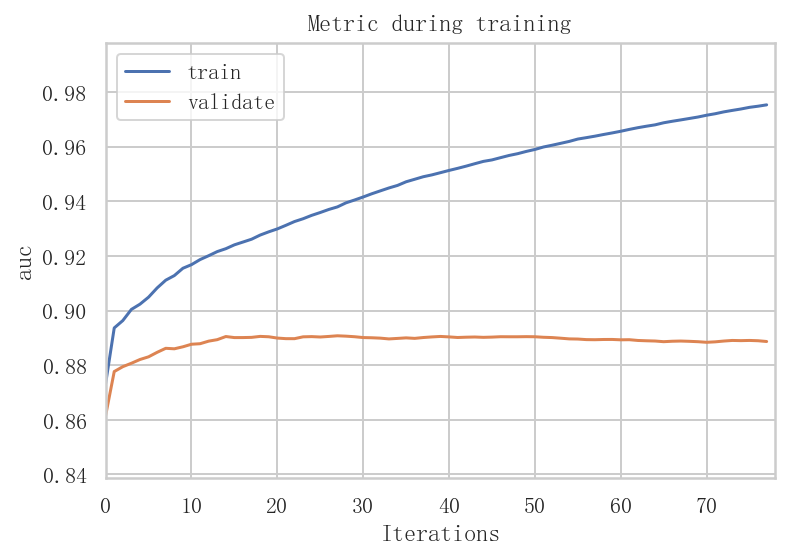

In [29]:
lgb.plot_metric(results)
plt.show()

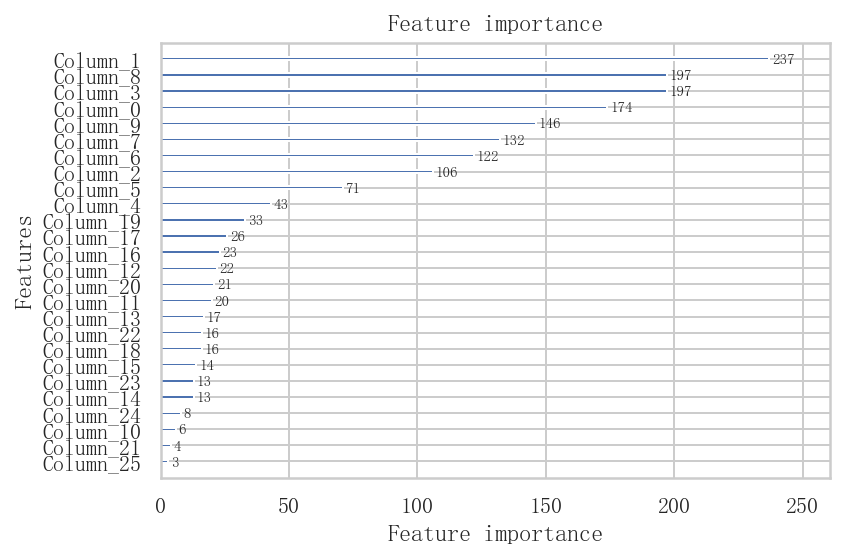

In [30]:
lgb.plot_importance(gbm,importance_type='split')
plt.show()

In [31]:
y_pred=gbm.predict(valid_x)

In [33]:
pred_labels = np.rint(y_pred)

In [34]:
pred_labels

array([0., 0., 0., ..., 0., 0., 1.])

In [46]:
from sklearn.metrics import *

In [47]:
y_test_true=valid_y.values

In [49]:
accuracy_score(y_test_true,pred_labels)

0.8846222222222222

In [51]:
test = pd.read_csv(r'..\新建文件夹\test (1).csv')
test

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
0,22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,...,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
1,22502,26,admin.,single,high.school,no,yes,no,cellular,may,...,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
2,22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,...,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
3,22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,...,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
4,22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,...,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,...,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
7496,29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,...,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
7497,29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,...,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80
7498,29999,31,technician,married,professional.course,no,no,no,cellular,aug,...,179,3,1028,0,nonexistent,1.4,96.90,-37.68,5.18,5144.45


In [52]:
#离散变量列名
object_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','day_of_week']
#连续变量列名
num_columns = ['age', 'duration', 'campaign', 'pdays', 'previous','emp_var_rate', 'cons_price_index','cons_conf_index','lending_rate3m', 'nr_employed']

In [54]:
X=test[['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed']]

In [55]:
X_trans=pd.get_dummies(X,columns=object_columns)

In [56]:
selected_columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed',
       'job_admin.', 'marital_married', 'education_university.degree',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'contact_cellular', 'month_mar', 'month_may', 'month_oct',
       'poutcome_nonexistent', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']

In [57]:
data=X_trans[selected_columns]

In [58]:
sc2=StandardScaler()

In [60]:
data_sc2=sc2.fit_transform(data)

In [61]:
valid_x.shape

(5625, 26)

In [63]:
y_pred2=gbm.predict(data_sc2)

In [64]:
pred_labels2 = np.rint(y_pred2)

In [65]:
pred_labels2

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
df=pd.DataFrame(pred_labels2)

In [69]:
df.to_excel(r"lgb.xlsx",index=False)